**EDA - Real Estate Analysis**

# **Import Library and Load Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/DS Capstone Project/preprocessed_integrate_v2.csv')
#df = pd.read_csv('/content/df_clean_v2.csv')
#df = pd.read_csv('/content/preprocessed_integrate_v2.csv')
df = pd.read_csv('/content/preprocessed_integrate.csv')
print(df.head())
print(df.info())

             street          ward      district     city   size  \
0     Tôn Đức Thắng      Hòa Minh    Liên Chiểu  Đà Nẵng   60.8   
1  Nguyễn Văn Thoại    Bắc Phú Mỹ  Ngũ Hành Sơn  Đà Nẵng  110.0   
2      Xuân Thiều 8  Hòa Hiệp Nam    Liên Chiểu  Đà Nẵng   80.0   
3       Lê Duy Đình        An Khê     Thanh Khê  Đà Nẵng   76.0   
4           Lê Duẩn     Tân Chính     Thanh Khê  Đà Nẵng  108.3   

   property_legal_document  bed_rooms  toilets  floors  price  house_type  
0                        1          4        1       2    5.8           1  
1                        1          6        5       4   13.3           1  
2                        1          2        1       2    3.6           1  
3                        1          4        4       4    7.2           1  
4                        1          4        3       4   15.5           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Data columns (total 11 columns):
 #   Column                   Non-

## **Dataset Overview**

### **1. Overview Dataset**

In [ ]:
df.head(7)

,street,ward,district,city,size,property_legal_document,bed_rooms,toilets,floors,price,house_type
0,Tôn Đức Thắng,Hòa Minh,Liên Chiểu,Đà Nẵng,60.8,1,4,1,2,5.8,1
1,Nguyễn Văn Thoại,Bắc Phú Mỹ,Ngũ Hành Sơn,Đà Nẵng,110.0,1,6,5,4,13.3,1
2,Xuân Thiều 8,Hòa Hiệp Nam,Liên Chiểu,Đà Nẵng,80.0,1,2,1,2,3.6,1
3,Lê Duy Đình,An Khê,Thanh Khê,Đà Nẵng,76.0,1,4,4,4,7.2,1
4,Lê Duẩn,Tân Chính,Thanh Khê,Đà Nẵng,108.3,1,4,3,4,15.5,1
5,Lê Duẩn,Tân Chính,Thanh Khê,Đà Nẵng,108.3,1,4,2,5,15.5,1
6,Võ Văn Tần,Chính Gián,Thanh Khê,Đà Nẵng,70.0,1,5,4,5,33.0,1


The first 7 rows of our dataset

In [ ]:
print("Dataset dimension (rows, columns): ", df.shape)

print("\nDtypes:")
print(df.dtypes)

Dataset dimension (rows, columns):  (7120, 11)

Dtypes:
street                      object
ward                        object
district                    object
city                        object
size                       float64
property_legal_document      int64
bed_rooms                    int64
toilets                      int64
floors                       int64
price                      float64
house_type                   int64
dtype: object


Shape of the dataset is (7,120, 11). It means that the dataset has **7,120 rows (real estates)** and **11 columns (features).**

As you can see from the dataset, it contains 11 columns describing various attributes of properties:
1. **street**: The specific street name where the property is located – **(object).**

2. **ward**: The administrative ward (phường/xã) of the property, providing neighborhood-level information – **(object).**

3. **district**: The district (quận/huyện) where the property is located, an important geographical unit that significantly influences property value – **(object).**

4. **city**: The city or province of the property location, representing the highest-level geographic segmentation – **(object).**

5. **size**: The land or floor area of the property measured in square meters (m²), a key physical indicator of property valuation – **(float64).**

6. **property_legal_document**: A numeric-encoded value representing the property’s legal documentation status (e.g., red book, pink book, permit), affecting ownership credibility – **(int64).**

7. **bed_rooms**: The total number of bedrooms in the property, indicating living capacity and interior space division – **(int64).**

8. **toilets**: The number of toilets/bathrooms in the property, reflecting comfort level and structural layout – **(int64).**

9. **floors**: The number of floors (stories) in the property, especially relevant for townhouses and multi-level residences – **(int64).**

10. **price**: The listing price of the property in billion Vietnamese đồng (billion VND), serving as the primary target variable for prediction and price analysis – **(float64).**

11. **house_type**: A numeric-encoded classification identifying the property type (e.g., townhouse, apartment, villa, land plot), useful for segmentation and modeling – **(int64).**


**Notes:**
- The dataset contains both numerical and categorical features, with `price` serving as the target variable.
- The `house_type` column is mapped into numerical categories to standardize different property types.  
Each value represents a specific housing category:

  - 1 → Nhà mặt phố, mặt tiền (main street frontage houses)
  - 2 → Nhà biệt thự (villa)
  - 3 → Nhà ngõ hẻm (alley-access houses)
  - 4 → Nhà phố liền kề (townhouse / linked houses)
- The `property_legal_document` column is transformed into numerical codes to represent different legal statuses.  
These categories indicate how complete or reliable a property's legal ownership documents are:

  - 1 → Full legal ownership (Sổ đỏ, Sổ hồng, Sổ hồng riêng, etc.)
  - 2 → Purchase contract (Hợp đồng mua bán)
  - 3 → Pending legal paperwork (Đang chờ số)
  - 4 → Shared ownership / Vi bằng (Sổ chung / công chứng vi bằng)
  - 5 → Deposit agreement (Hợp đồng đặt cọc)
  - 6 → Handwritten document (Giấy tờ viết tay)
  - 7 → Other legal documents (Giấy tờ khác)
  - 8 → No ownership document (Không có số)
  - 9 → Undefined or unclear legal status (Không xác định, nan, empty)
  

### **2. Feature Types**

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical features:", numerical_cols)
print("Categorical features:", categorical_cols)


Numerical features: ['size', 'property_legal_document', 'bed_rooms', 'toilets', 'floors', 'price', 'house_type']
Categorical features: ['street', 'ward', 'district', 'city']


- **Numerical Features:** size, price, bed_rooms, toilets, floors, property_legal_document, house_type → **histograms, boxplots, scatter plots, correlations**


- **Categorical Features:** street, ward, district, city → **bar charts, frequency distributions, grouping and aggregations**

In [ ]:
pd.options.display.float_format = '{:.0f}'.format

desc = df.describe().T.round(2)
desc

,count,mean,std,min,25%,50%,75%,max
size,7120,134,1137,5,60,81,110,92652
property_legal_document,7120,1,1,1,1,1,1,9
bed_rooms,7120,4,5,1,2,3,4,100
toilets,7120,4,5,1,2,3,4,100
floors,7120,3,2,1,2,3,3,34
price,7120,21,274,0,4,6,11,14798
house_type,7120,2,1,1,1,1,3,4


## **Overview of Numerical Feature Statistics**

All numerical features (`size`, `price`, `bed_rooms`, `toilets`, `floors`, `property_legal_document`, `house_type`) contain **7,120 valid observations**. This confirms that there are **no missing values** in the numerical columns, which is a solid starting point for analysis.

That said, completeness does not equal cleanliness. Several variables are heavily influenced by **outliers**, making simple averages unreliable. In many cases, the **median provides a much more realistic picture** of the data.

---

## **Distribution-Level Insights**

### **Mean vs. Median**
- The **mean** is strongly affected by extreme values in multiple features.
- For example:
  - **Size** has an average of **134 m²**, which is far above the median.
  - **Price** has a mean of **21**, clearly inflated by a small number of very expensive listings.

This pattern signals **right-skewed distributions**, where a few extreme cases distort the overall statistics.

### **Variability (Standard Deviation)**
- **Size** shows an exceptionally large standard deviation (**1,137**), indicating extreme dispersion and the presence of unrealistic values.
- **Price** also varies wildly (**std = 274**), confirming that price values are highly inconsistent.

### **Range and Extreme Values**
- **Size** ranges from **5 m² to 92,652 m²**, which strongly suggests data errors or very rare special cases.
- **Price** ranges from **0 to 14,798**, highlighting both invalid entries (`price = 0`) and extreme outliers.


### **Percentiles (25%, 50%, 75%)**
- **Median size:** 81 m² — much lower than the mean, reinforcing the strong right skew.
- **Median price:** 6 — again, far below the mean, showing that high prices are rare but impactful.

---

## **Feature-by-Feature Observations**

### **1. Size (m²)**
- **Mean:** 134  
- **Median:** 81  
- **Std:** 1,137  
- **Range:** 5 – 92,652  

**Insight:** Most properties are under 110 m², but a few extremely large values severely distort the distribution. This feature is heavily right-skewed and requires outlier handling.

### **2. Price**
- **Mean:** 21  
- **Median:** 6  
- **Std:** 274  
- **Range:** 0 – 14,798  

**Insight:** Price data is strongly affected by extreme values and invalid entries (`price = 0`). This feature must be cleaned and transformed before modeling.

### **3. Bedrooms**
- **Mean:** 4  
- **Max:** 100  

**Insight:** The majority of homes have 2–4 bedrooms. Extremely large values (e.g., 100) are almost certainly noise or data collection errors.

### **4. Toilets**
- **Mean:** 4  
- **Max:** 100  

**Insight:** Similar to bedrooms, most values are reasonable, but extreme cases are not realistic and should be filtered or capped.


### **5. Floors**
- **Mean:** 3  
- **Median:** 3  
- **Max:** 34  

**Insight:** Most houses have 2–3 floors, which aligns well with typical urban housing in Vietnam. Very tall structures may exist, but values above 30 should be reviewed carefully.

### **6. Property Legal Document**

**Insight:** Although numeric, this variable represents encoded legal status categories and should be treated as **categorical**, not continuous.

### **7. House Type**

**Insight:** This is a categorical encoding of housing types and should be modeled accordingly.

---

## **Key Takeaways for Data Cleaning & Modeling**

- Severe **outliers** exist in `size`, `price`, `bed_rooms`, and `toilets`.
- Apply **outlier removal or capping** using IQR or percentile-based methods.
- Use **log or log1p transformations** for `size` and `price` to reduce skewness.
- Remove or properly handle records with **`price = 0`**.
- Treat `property_legal_document` and `house_type` as **categorical features**.
- Given the heavy skewness, **median-based statistics are more informative than means**.


### **3. Missing Value Analysis**

In [ ]:
missing = df.isnull().sum().reset_index()
missing.columns = ['column', 'missing_count']
missing['missing_pct'] = (missing['missing_count'] / df.shape[0] * 100).round(2)

missing.sort_values(by='missing_count', ascending=False, inplace=True)
missing

,column,missing_count,missing_pct
0,street,0,0
1,ward,0,0
2,district,0,0
3,city,0,0
4,size,0,0
5,property_legal_document,0,0
6,bed_rooms,0,0
7,toilets,0,0
8,floors,0,0
9,price,0,0


The dataset contains **no missing** values in any column. No imputation **(median/mode filling)** is required at this stage.

This dataset simplifies **preprocessing.**

### **4. Basic Statistics Summary**

## **EDA (Exploratory Data Analysis)**

### **2.1 Univariate Analysis**

#### **2.1.1 Numerical Distributions**

We use HistPlot for **numerical features:** `price`, `size`, ...


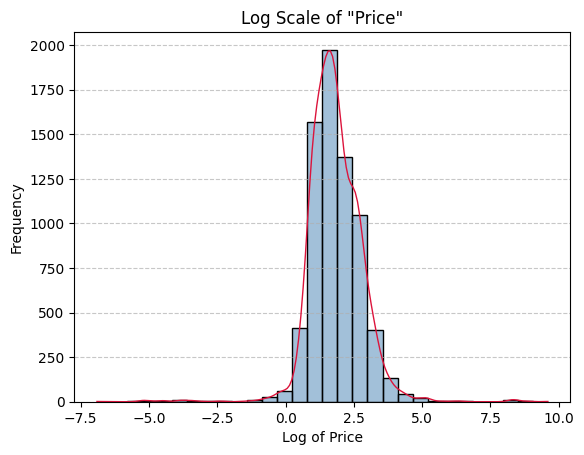

In [ ]:
# Histplot for log value of "price"

ax = sns.histplot(np.log(df['price']), kde=True, bins=30, color='steelblue', line_kws={'linewidth': 1})
ax.lines[0].set_color('crimson')

plt.title('Log Scale of "Price"')
plt.xlabel("Log of Price")
plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Analysis of Log-Scaled Price Distribution**

The figure presents a histogram of **log-transformed property prices** with an overlaid **Kernel Density Estimation (KDE) curve** shown in red. Compared to the raw price distribution, the log-scaled version is much more compact and closer to a bell-shaped form, making the underlying structure of the data easier to interpret.

**Key insights:**
- **Reduced Skewness:** Applying the log transformation significantly compresses extreme price values, reducing the strong right skew observed in the original price data.
- **Core Market Concentration:** Most observations are clustered within a relatively narrow log-price range (approximately 1–3), representing the main segment of the housing market.
- **Multimodal Pattern:** The KDE curve shows multiple peaks, indicating the presence of distinct price segments, likely driven by differences in location, property type, or market tier.
- **Remaining Outliers:** A small number of observations still appear in the far right tail after transformation, suggesting either ultra-luxury properties or potential data errors that may need further inspection or capping.


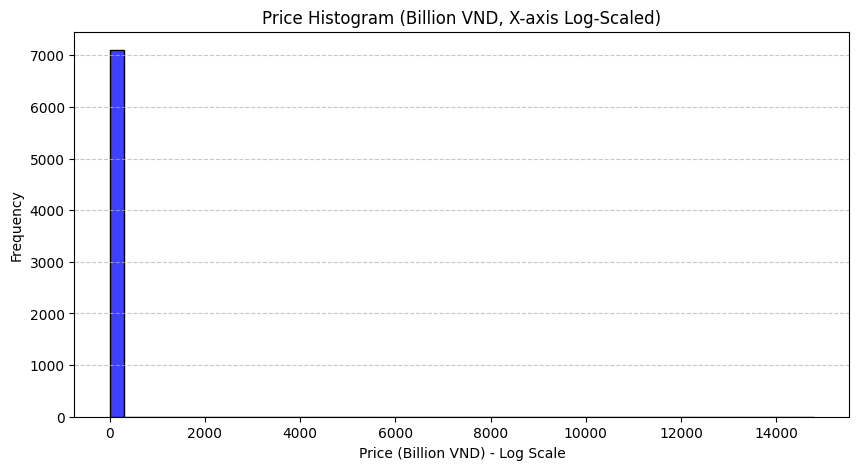

In [ ]:
plt.figure(figsize=(10,5))

sns.histplot(df['price'], bins=50, color='blue')

#plt.xscale('log')
plt.title("Price Histogram (Billion VND, X-axis Log-Scaled)")
plt.xlabel("Price (Billion VND) - Log Scale")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


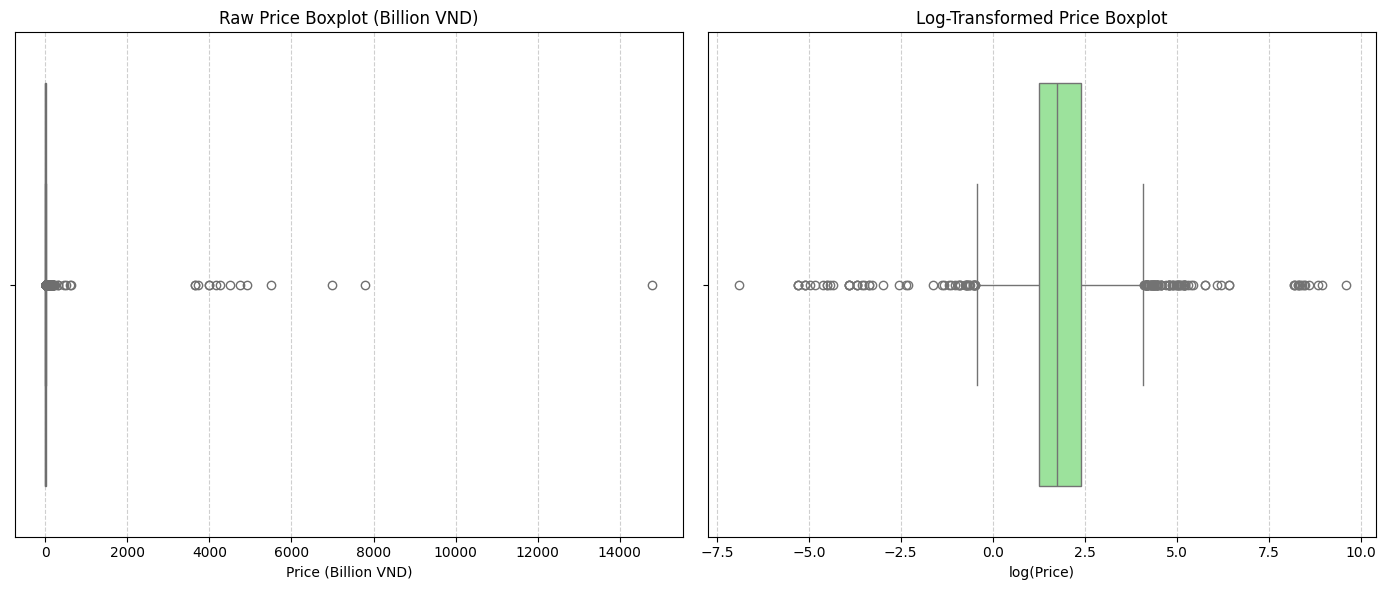

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14,6))

# ----- Raw Price Boxplot -----
plt.subplot(1,2,1)
sns.boxplot(x=df['price'], color='skyblue')
plt.title("Raw Price Boxplot (Billion VND)")
plt.xlabel("Price (Billion VND)")
plt.grid(axis='x', linestyle='--', alpha=0.6)

# ----- Log Price Boxplot -----
plt.subplot(1,2,2)
sns.boxplot(x=np.log(df['price']), color='lightgreen')
plt.title("Log-Transformed Price Boxplot")
plt.xlabel("log(Price)")
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


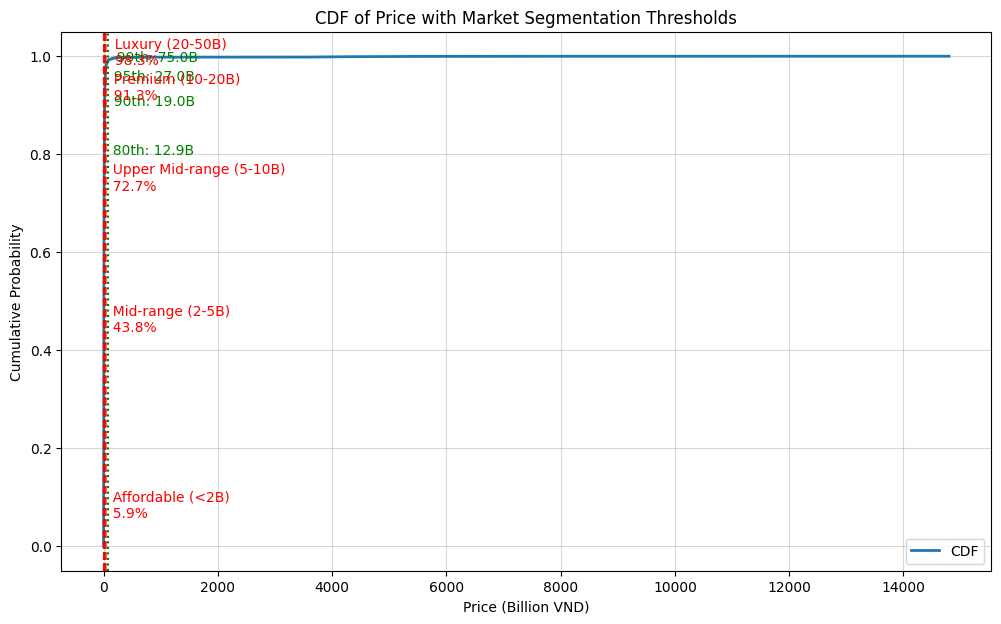

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sort price for CDF
prices = np.sort(df['price'])
p = np.arange(len(prices)) / (len(prices)-1)

# Define market segmentation thresholds (billion VND)
thresholds = {
    "Affordable (<2B)": 2,
    "Mid-range (2-5B)": 5,
    "Upper Mid-range (5-10B)": 10,
    "Premium (10-20B)": 20,
    "Luxury (20-50B)": 50
}

plt.figure(figsize=(12,7))

# Plot CDF line
plt.plot(prices, p, label="CDF", linewidth=2)

percentiles = [0.8, 0.9, 0.95, 0.99]

for pctl in percentiles:
    val = df['price'].quantile(pctl)
    plt.axvline(val, color='green', linestyle=':')
    plt.text(val, pctl, f"  {pctl*100:.0f}th: {val:.1f}B", color='green')


# Add vertical lines for thresholds
for label, t in thresholds.items():
    cdf_val = (df['price'] <= t).mean()
    plt.axvline(t, color='red', linestyle='--', alpha=0.6)
    plt.text(t, cdf_val, f"  {label}\n  {cdf_val*100:.1f}%", color='red')

plt.title("CDF of Price with Market Segmentation Thresholds")
plt.xlabel("Price (Billion VND)")
plt.ylabel("Cumulative Probability")
plt.grid(alpha=0.5)
plt.legend()
plt.show()


In [ ]:
df['house_type'].value_counts()


,count
house_type,
1,4270
3,2424
2,401
4,25


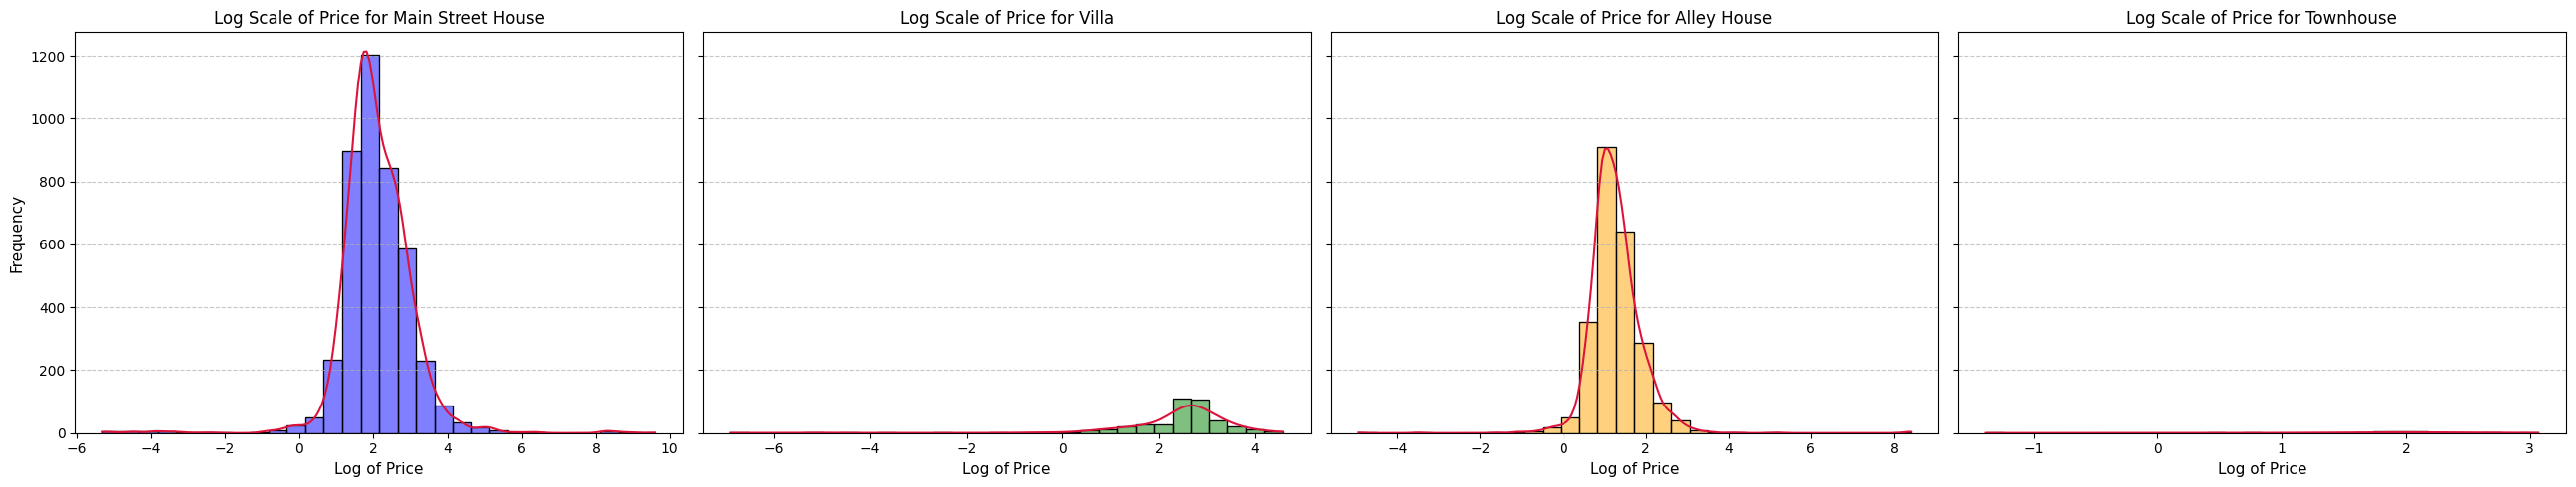

In [ ]:
# =====================================
# Log Scale of Price for Each House Type
# =====================================

# Mapping house_type to readable labels
house_type_mapping = {
    1: 'Main Street House',
    2: 'Villa',
    3: 'Alley House',
    4: 'Townhouse',
}

types = [1, 2, 3, 4]
colors = ['blue', 'green', 'orange', 'purple']

fig, axes = plt.subplots(1, 4, figsize=(26, 5), sharey=True)

for i, (t, color) in enumerate(zip(types, colors)):
    subset = df[df['house_type'] == t]

    # Avoid errors if subset is empty
    if subset.shape[0] == 0:
        continue

    ax = sns.histplot(
        np.log(subset['price']),
        kde=True,
        bins=30,
        color=color,
        ax=axes[i]
    )

    # Change KDE line color to crimson if exists
    if ax.lines:
        ax.lines[0].set_color('crimson')

    axes[i].set_title(f'Log Scale of Price for {house_type_mapping[t]}', fontsize=12)
    axes[i].set_xlabel("Log of Price", fontsize=11)
    axes[i].set_ylabel("Frequency" if i == 0 else "", fontsize=11)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


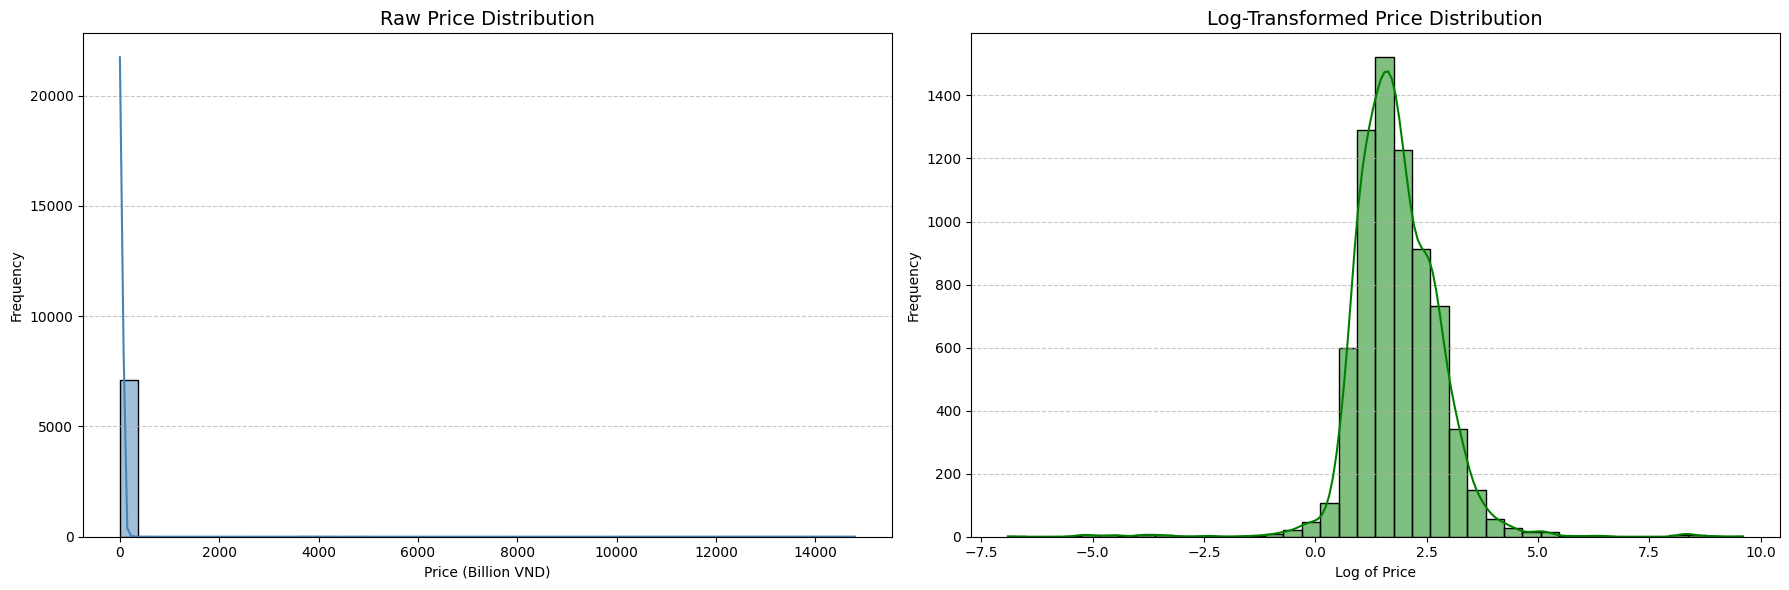

In [ ]:
# ==========================================
# SIDE-BY-SIDE COMPARISON: RAW PRICE vs LOG PRICE
# ==========================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# --- RAW PRICE ---
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=40, color="steelblue", kde=True)
plt.title("Raw Price Distribution", fontsize=14)
plt.xlabel("Price (Billion VND)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# --- LOG PRICE ---
plt.subplot(1, 2, 2)
sns.histplot(np.log(df['price']), bins=40, color="green", kde=True)
plt.title("Log-Transformed Price Distribution", fontsize=14)
plt.xlabel("Log of Price")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


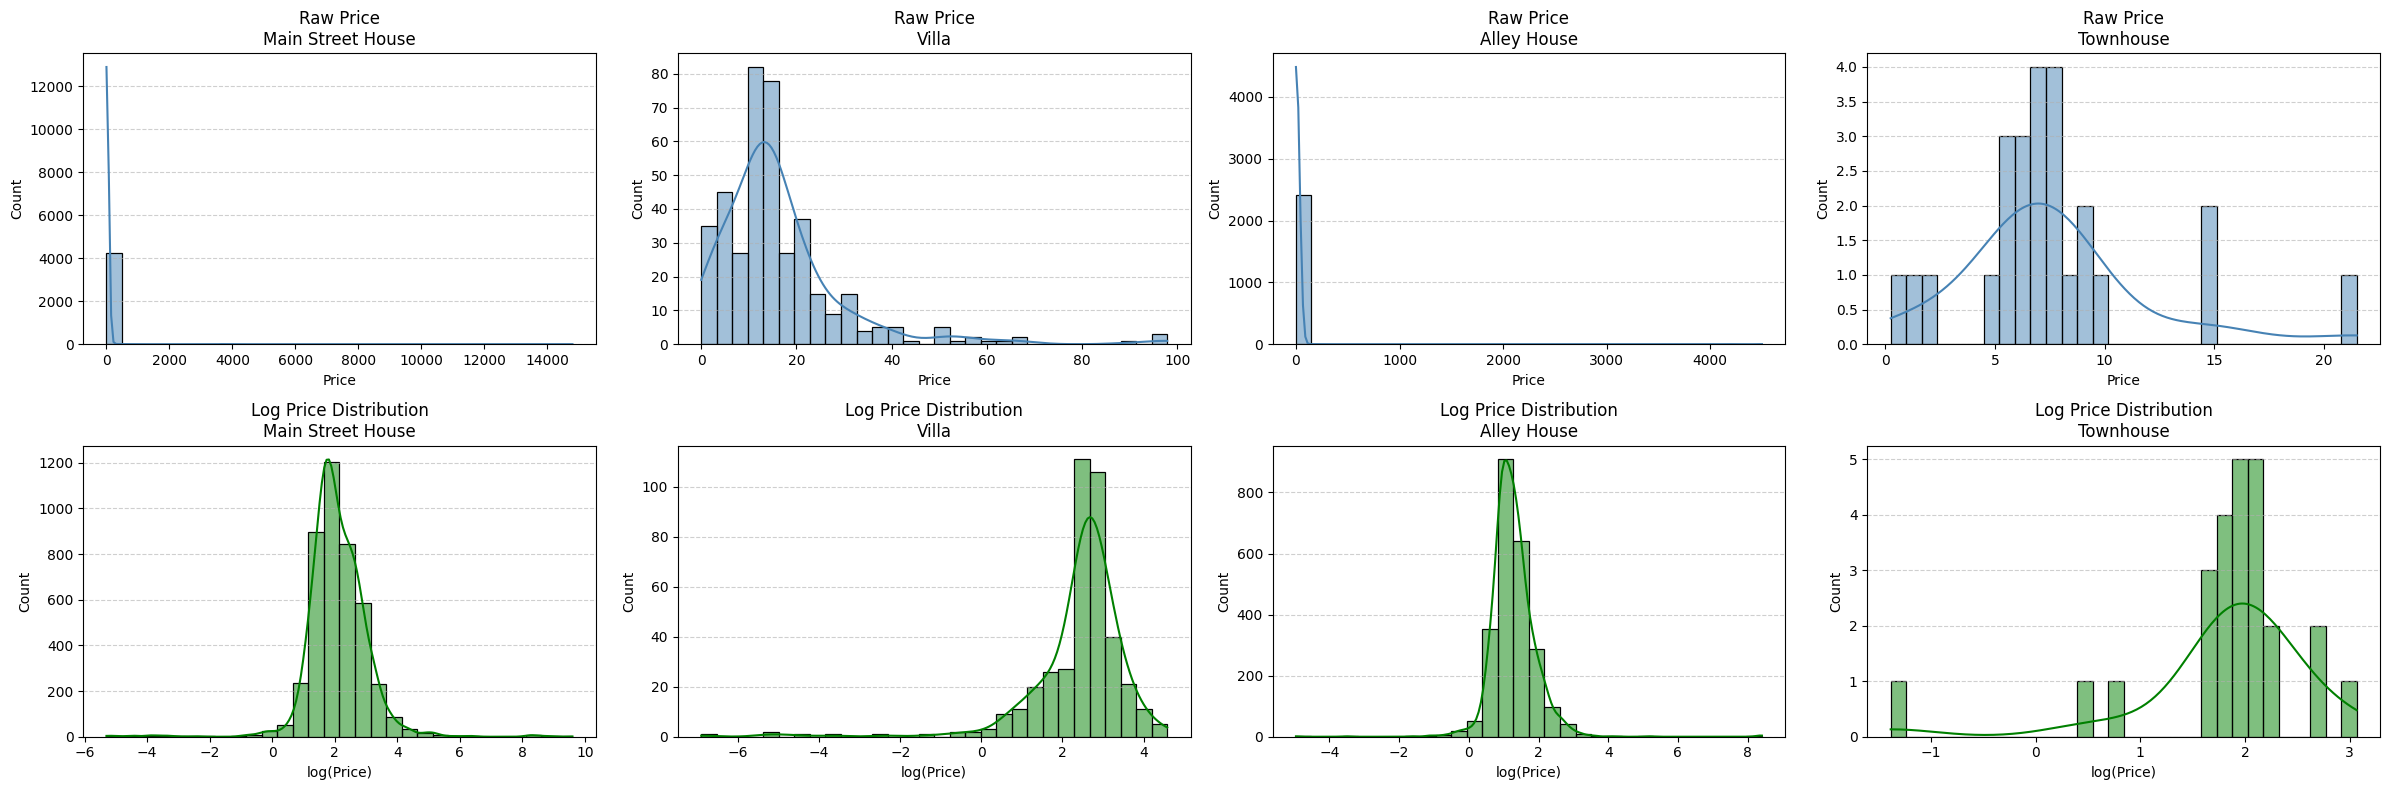

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

house_type_mapping = {
    1: 'Main Street House',
    2: 'Villa',
    3: 'Alley House',
    4: 'Townhouse',
}

available_types = sorted(df['house_type'].unique())

fig, axes = plt.subplots(
    nrows=2,
    ncols=len(available_types),
    figsize=(6 * len(available_types), 8),
    sharey=False
)

for i, ht in enumerate(available_types):

    subset = df[(df['house_type'] == ht) & (df['price'] > 0)].copy()

    if len(subset) == 0:
        axes[0, i].set_title(f"No valid price for {house_type_mapping[ht]}")
        axes[1, i].axis("off")
        continue

    # RAW PRICE (Billion VND)
    sns.histplot(
        subset['price'],
        bins=30,
        kde=True,
        ax=axes[0, i],
        color="steelblue"
    )
    axes[0, i].set_title(f"Raw Price\n{house_type_mapping[ht]}")
    axes[0, i].set_xlabel("Price")
    axes[0, i].set_ylabel("Count")
    axes[0, i].grid(axis="y", linestyle="--", alpha=0.6)

    # LOG PRICE (Log of Billion VND)

    subset['log_price'] = np.log(subset['price'])

    sns.histplot(
        subset['log_price'],
        bins=30,
        kde=True,
        ax=axes[1, i],
        color="green"
    )
    axes[1, i].set_title(f"Log Price Distribution\n{house_type_mapping[ht]}")
    axes[1, i].set_xlabel("log(Price)")
    axes[1, i].set_ylabel("Count")
    axes[1, i].grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


### Difference Between `log` and `log1p`

- **`log(x)`** computes the natural logarithm of `x`.  
  - Only works for **x > 0**  
  - `log(0)` → `-inf` (causes warnings and breaks visualizations)  
  - Strongly compresses small values  

- **`log1p(x)`** computes `log(1 + x)`.  
  - Safe for **x = 0** → returns `0` instead of `-inf`  
  - More numerically stable for small values  
  - Produces smoother distributions for skewed data  

### When to use which?

- Use **`log(x)`** only when all values are strictly positive.  
- Use **`log1p(x)`** for real-world data that may contain zeros or very small values (recommended for price and size).  

**BIG NOTICE:**
- For **large x**, `log(x)` approximates `log1p(x)`
- For **small x**, `log(x)` and `log1p(x)` are slightly different

**In summary:**  `log1p` is the safer and more practical transformation for EDA and modeling because it avoids errors and stabilizes skewed features.


---

## **Summary & Key Insights — Feature: `price` (Billion VND)**

Based on the full set of visualizations (raw histograms, log-scaled distributions, boxplots, CDF, and house-type breakdowns), the **price feature is the most problematic yet most informative variable** in the dataset.


#### **1. Overall Price Distribution Behavior**
- The **raw price distribution is extremely right-skewed**, with the majority of properties concentrated at very low values while a small number of listings extend to **astronomically large prices**.
- These extreme values completely dominate:
  - Histograms (collapsed into a single bar)
  - Boxplots (nearly unreadable)
  - Summary statistics (mean and std become meaningless)

**Raw price cannot be reliably used for exploratory analysis or modeling.**

#### **2. Impact of Log Transformation**
- Applying a **log transformation** dramatically improves interpretability:
  - The distribution becomes **compact and approximately bell-shaped**
  - KDE curves are smooth and informative
  - Boxplots reveal a clear median and interquartile range
- The log-price distribution is **clearly multimodal**, indicating **distinct market segments** rather than a single homogeneous market.

**Log(price) is essential to uncover the true structure of housing prices.**

#### **3. Price Patterns by House Type**
- **Main street houses**:
  - Wide price range
  - Multiple clusters → highly heterogeneous segment
- **Alley houses**:
  - More concentrated distribution
  - Generally cheaper than main street properties
- **Villas**:
  - Clearly separated, high-price segment
  - Tighter log distribution → consistent premium pricing
- **Townhouses**:
  - Very small sample size
  - Distribution is unstable and not statistically reliable

**House type has a strong and systematic impact on price and must be modeled explicitly.**

#### **4. CDF & Market Segmentation Insights**
- The cumulative distribution function (CDF) shows that:
  - **The vast majority of properties fall into low-to-mid price ranges**
  - Only a very small fraction occupy the high-end and luxury segments
- However, unusually high cumulative percentages in premium and luxury bands reveal **outlier inflation**, not genuine market behavior.

**CDF confirms market concentration while simultaneously exposing data quality issues.**

#### **5. Outliers & Data Quality Issues**
- Some listings reach **10⁷–10⁸ billion VND**, which is clearly impossible.
- These values are almost certainly:
  - Scraping errors
  - Unit inconsistencies
  - Placeholder or malformed prices
- Such outliers severely distort:
  - Distributions
  - Boxplots
  - CDF scaling
  - Correlations with other features

**Aggressive outlier handling is mandatory.**

### **Key Takeaways**
- Raw `price` is **not usable** due to extreme and invalid outliers.
- **Log transformation reveals meaningful price structure and segmentation.**
- Price behavior varies strongly by **house type**, reflecting real market dynamics.
- CDF analysis highlights both **market concentration** and **data corruption**.
- Recommended preprocessing:
  - Remove or clip prices above the **99.5–99.9 percentile**
  - Apply **log(price)** consistently in all downstream models

***In short:***  `price` is noisy but highly informative. With proper cleaning and log transformation, it becomes one of the strongest predictors in the dataset.


**Features `size`:**

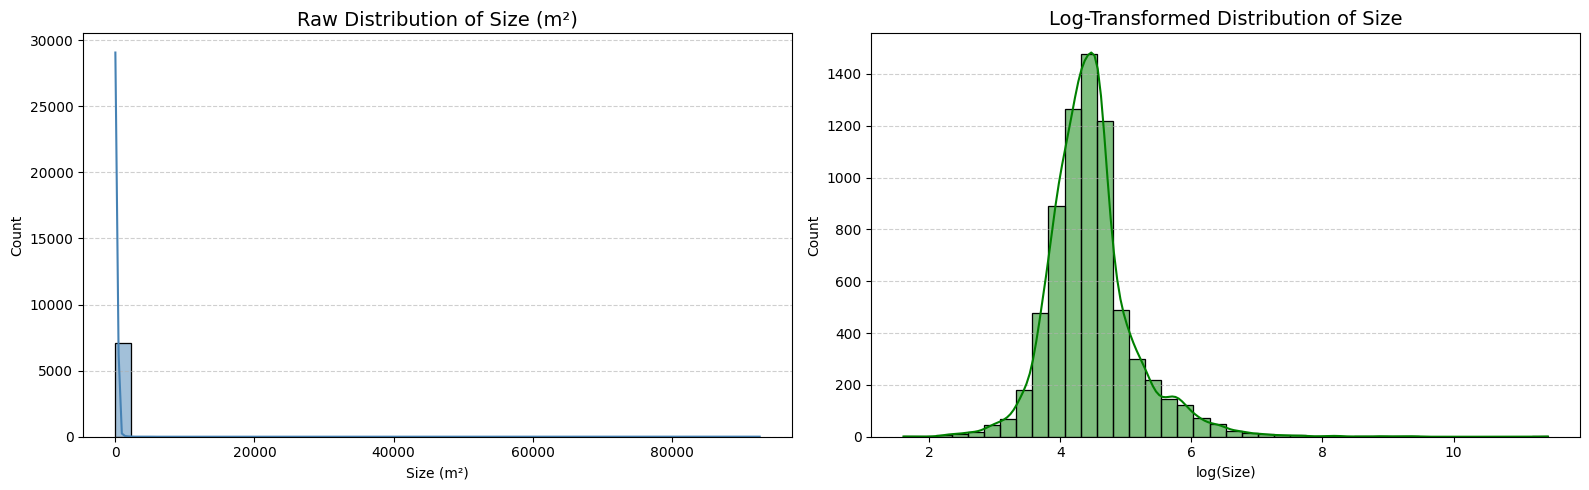

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))

# ==========================
# RAW SIZE DISTRIBUTION
# ==========================
plt.subplot(1, 2, 1)
sns.histplot(df['size'], bins=40, kde=True, color='steelblue')
plt.title("Raw Distribution of Size (m²)", fontsize=14)
plt.xlabel("Size (m²)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# ==========================
# LOG SIZE DISTRIBUTION
# ==========================
plt.subplot(1, 2, 2)
sns.histplot(np.log(df['size']), bins=40, kde=True, color='green')
plt.title("Log-Transformed Distribution of Size", fontsize=14)
plt.xlabel("log(Size)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


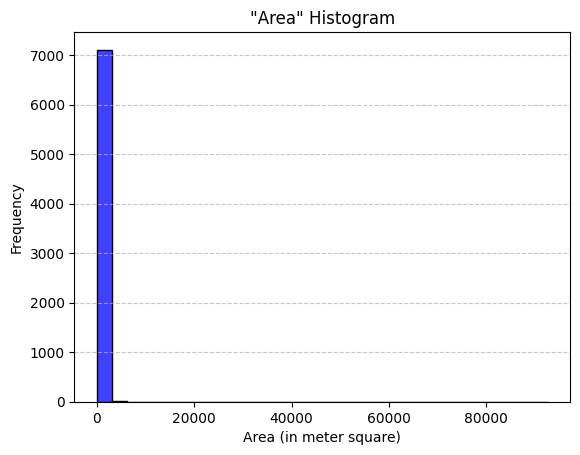

In [ ]:
ax = sns.histplot(df['size'], kde=False, bins=30, color='blue', line_kws={'linewidth': 1})

plt.title('"Area" Histogram')
plt.xlabel("Area (in meter square)")
plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

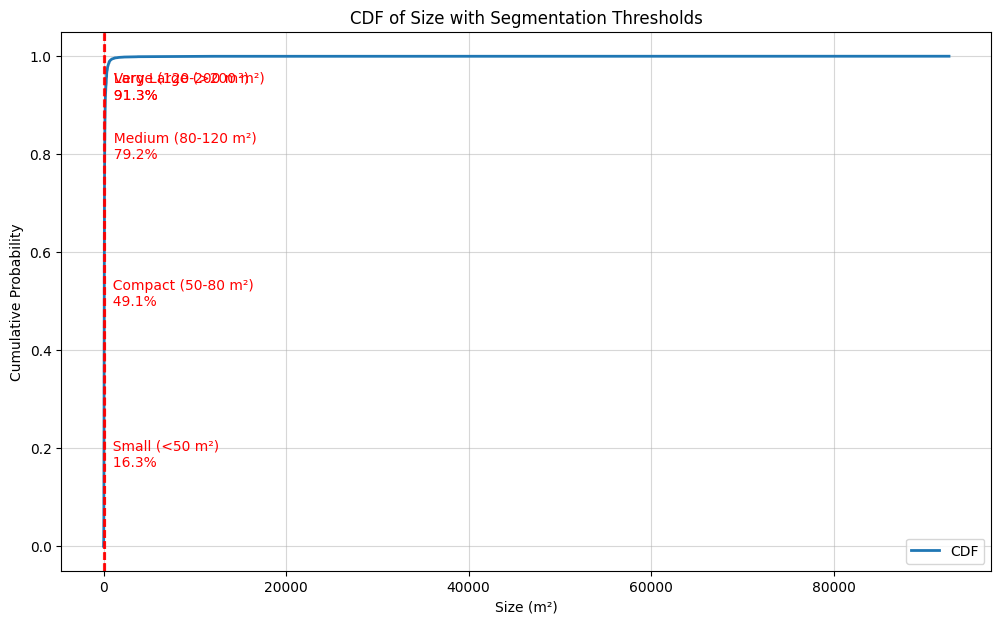

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sort size for CDF
sizes = np.sort(df['size'])
p = np.arange(len(sizes)) / (len(sizes) - 1)

# Define size segmentation thresholds (you can adjust)
thresholds = {
    "Small (<50 m²)": 50,
    "Compact (50-80 m²)": 80,
    "Medium (80-120 m²)": 120,
    "Large (120-200 m²)": 200,
    "Very Large (>200 m²)": 200  # upper threshold marker
}

plt.figure(figsize=(12, 7))

# Plot CDF
plt.plot(sizes, p, label="CDF", linewidth=2)

# Draw segmentation threshold markers
for label, t in thresholds.items():
    cdf_val = (df['size'] <= t).mean()
    plt.axvline(t, linestyle='--', color='red', alpha=0.6)
    plt.text(t, cdf_val, f"  {label}\n  {cdf_val*100:.1f}%", color='red')

plt.title("CDF of Size with Segmentation Thresholds")
plt.xlabel("Size (m²)")
plt.ylabel("Cumulative Probability")
plt.grid(alpha=0.5)
plt.legend()
plt.show()


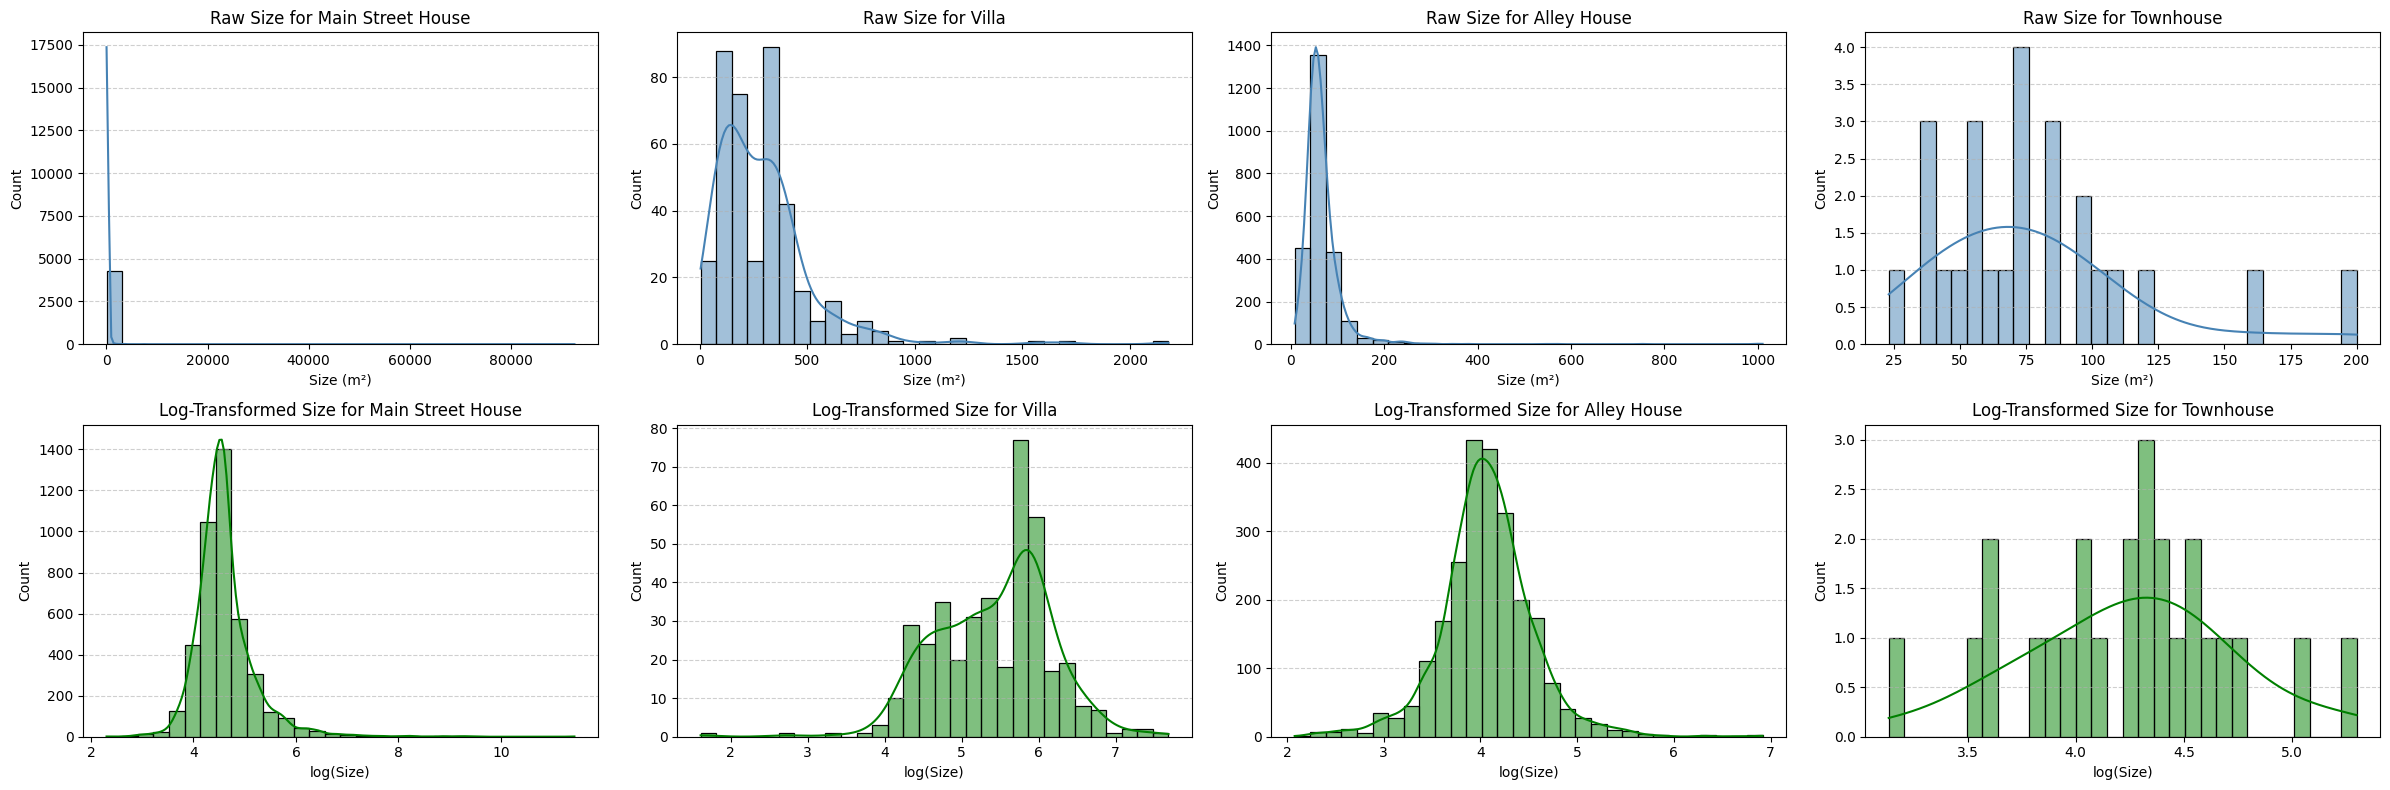

In [ ]:
house_type_mapping = {
    1: 'Main Street House',
    2: 'Villa',
    3: 'Alley House',
    4: 'Townhouse',
}

available_types = sorted(df['house_type'].unique())

fig, axes = plt.subplots(
    nrows=2,
    ncols=len(available_types),
    figsize=(6 * len(available_types), 8),
    sharey=False
)

for i, ht in enumerate(available_types):

    subset = df[df['house_type'] == ht].copy()

    if len(subset) == 0:
        axes[0, i].set_title(f"No valid size data for {house_type_mapping[ht]}")
        axes[1, i].axis("off")
        continue

    # =======================
    # RAW SIZE
    # =======================
    sns.histplot(
        subset['size'],
        bins=30,
        kde=True,
        ax=axes[0, i],
        color='steelblue'
    )
    axes[0, i].set_title(f"Raw Size for {house_type_mapping[ht]}")
    axes[0, i].set_xlabel("Size (m²)")
    axes[0, i].set_ylabel("Count")
    axes[0, i].grid(axis='y', linestyle='--', alpha=0.6)

    # =======================
    # LOG SIZE (log1p)
    # =======================
    subset['log_size'] = np.log(subset['size'])

    sns.histplot(
        subset['log_size'],
        bins=30,
        kde=True,
        ax=axes[1, i],
        color='green'
    )
    axes[1, i].set_title(f"Log-Transformed Size for {house_type_mapping[ht]}")
    axes[1, i].set_xlabel("log(Size)")
    axes[1, i].set_ylabel("Count")
    axes[1, i].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## **Summary & Key Insights — Feature: `size` (m²)**

Based on the full set of visualizations (raw histograms, log-transformed distributions, CDF, boxplots, and house-type breakdowns), the **`size` feature shows strong skewness, extreme outliers, and clear structural patterns once properly transformed**.

#### **1. Overall Size Distribution Behavior**
- The **raw size distribution is extremely right-skewed**, with most properties clustered at relatively small areas and a long tail extending to **tens of thousands of square meters**.
- These extreme values cause:
  - Raw histograms to collapse near zero
  - Boxplots to lose interpretability
  - Mean and standard deviation to become unreliable

➡️ **Raw `size` values are not suitable for direct EDA or modeling.**

#### **2. Impact of Log Transformation**
- Applying **log(size)** dramatically improves the distribution:
  - The histogram becomes **smooth and unimodal**
  - The distribution approaches a bell-shaped form
  - KDE curves clearly capture the central tendency
- Log-transformed boxplots show:
  - A stable median
  - Reasonable IQR
  - Fewer influential outliers

➡️ **Log transformation is essential to reveal realistic size patterns.**

#### **3. Size Patterns by House Type**
- **Main street houses**:
  - Broad size range
  - Log-size distribution centered around mid-sized urban homes
- **Alley houses**:
  - More compact and smaller sizes
  - Tighter log distribution, reflecting constrained land access
- **Villas**:
  - Significantly larger sizes
  - Higher log-size center with a wider spread → luxury land parcels
- **Townhouses**:
  - Very limited sample size
  - Size distribution is noisy and statistically unstable

➡️ **Property type has a strong and interpretable relationship with size.**

#### **4. CDF & Market Segmentation Insights**
- CDF analysis shows a strong concentration in typical residential sizes:
  - **<50 m² (small):** ~16%
  - **50–80 m² (compact):** ~49%
  - **80–120 m² (medium):** ~79%
  - **120–200 m² (large):** ~91%
- Sizes beyond this range represent a **very small fraction** of listings but dominate raw-scale visuals.

➡️ **The Vietnamese housing market is heavily concentrated in small-to-medium plots.**

#### **5. Outliers & Data Quality Issues**
- Some listings exceed **20,000–90,000 m²**, which is:
  - Unrealistic for residential properties
  - Likely caused by scraping errors, unit mistakes, or land listings mixed in
- These values severely distort:
  - Distributions
  - Correlations with price
  - Scale-sensitive models

➡️ **Aggressive outlier handling is required.**

#### **Key Takeaways**
- Raw `size` is **not usable** due to extreme right skew and unrealistic outliers.
- **Log(size)** reveals a stable, interpretable distribution suitable for modeling.
- Size varies systematically by **house type**, reflecting real urban constraints.
- CDF confirms strong market concentration in compact and medium-sized properties.
- Recommended preprocessing:
  - Clip or remove sizes above the **99.5–99.9 percentile**
  - Apply **log(size)** consistently in all downstream models

📌 ***In short:***  `size` is a noisy but critical feature. With proper cleaning and log transformation, it becomes a powerful and reliable predictor closely tied to both price and housing type.


**Features `floors`:**

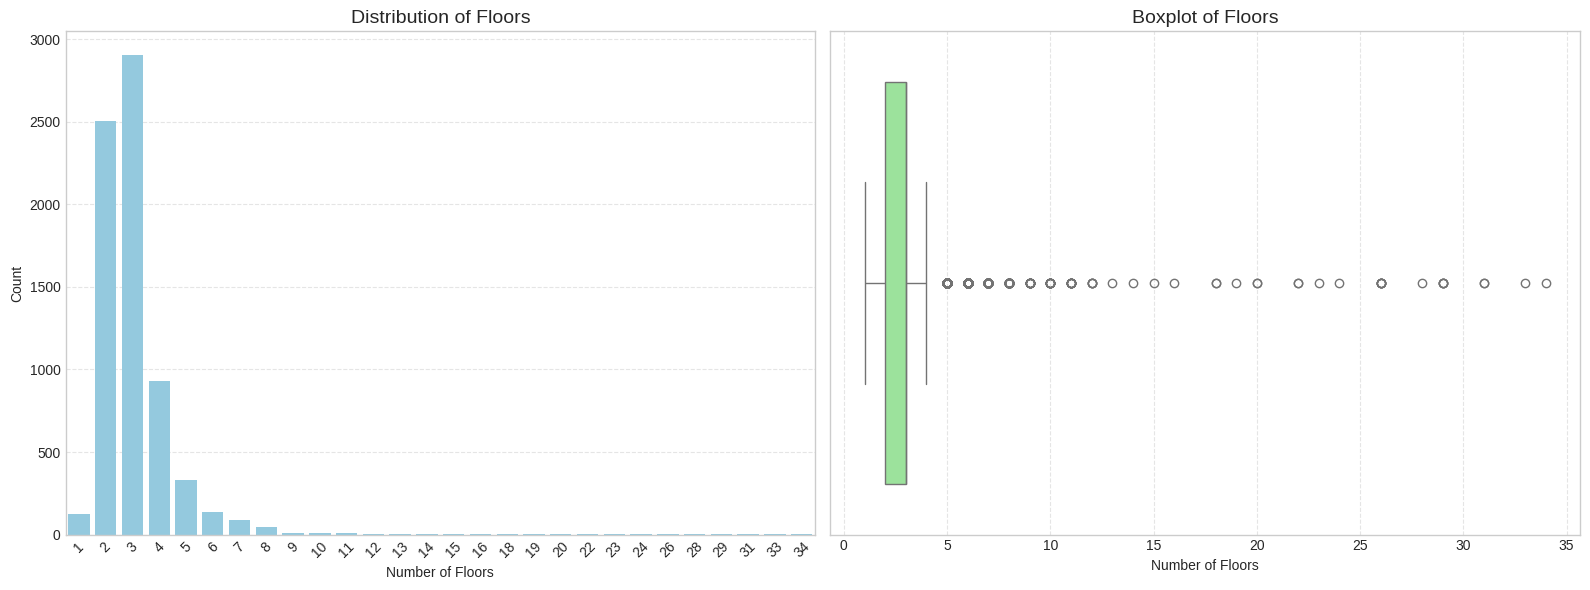

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- 1. Countplot ---
sns.countplot(data=df, x='floors', ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of Floors", fontsize=14)
axes[0].set_xlabel("Number of Floors")
axes[0].set_ylabel("Count")
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Rotate x labels if many categories
axes[0].tick_params(axis='x', rotation=45)

# --- 2. Boxplot ---
sns.boxplot(x=df['floors'], ax=axes[1], color='lightgreen')
axes[1].set_title("Boxplot of Floors", fontsize=14)
axes[1].set_xlabel("Number of Floors")
axes[1].grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**Summary for Feature: `floors`**

Most properties have **2–4 floors**, which fits common Vietnamese urban housing structures. The countplot indicates a rapid decrease after 3 floors, meaning mid-rise buildings dominate the dataset.

The boxplot reveals several extreme floor counts **(10–34 floors)**. These values are **unrealistic for typical houses** and may indicate:

- Data entry issues
- Scraping artifacts
- Misclassified apartment buildings

The distribution is **highly right-skewed**, suggesting the need to:
- Clip or remove extreme floor counts
- Consider binning floors into categories (e.g., low-rise, mid-rise, high-rise)

Floors correlate with **property type and size**; more floors often imply larger, more expensive structures.

**Features `bedrooms`:**

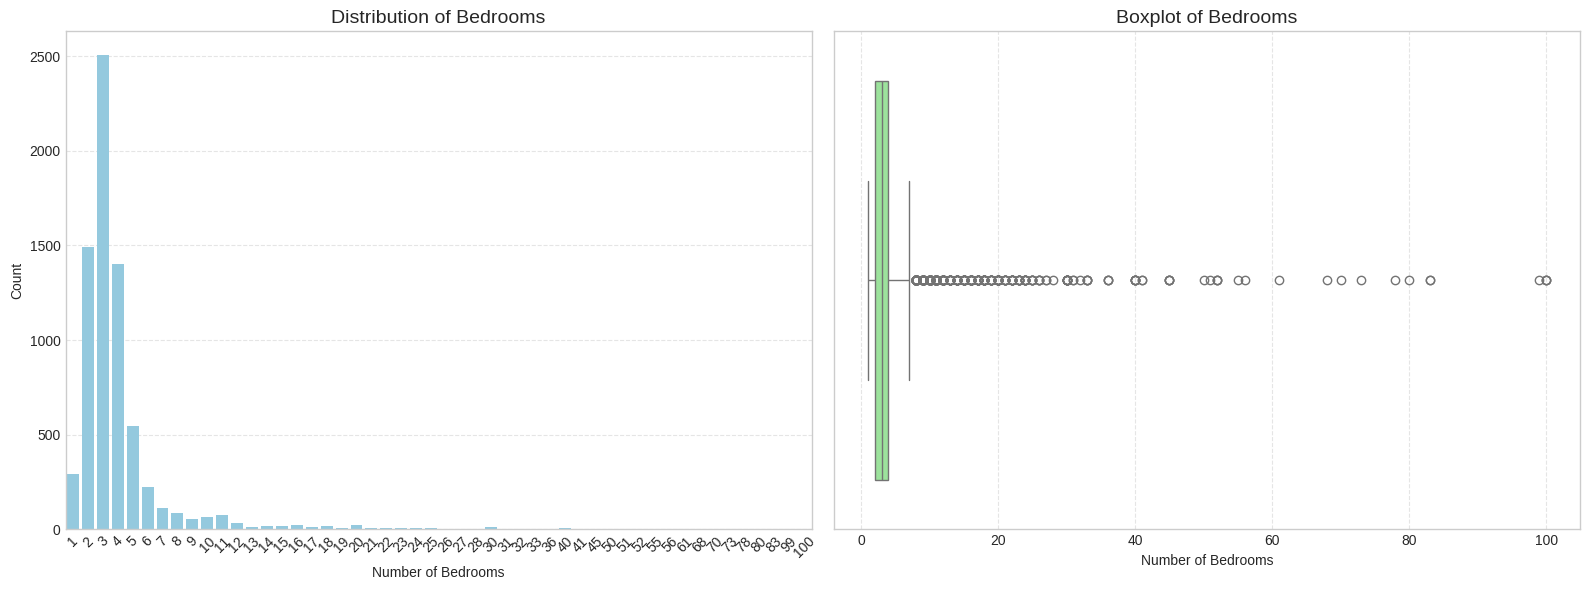

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Countplot for Bedrooms ---
sns.countplot(data=df, x='bed_rooms', ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of Bedrooms", fontsize=14)
axes[0].set_xlabel("Number of Bedrooms")
axes[0].set_ylabel("Count")
axes[0].grid(axis='y', linestyle='--', alpha=0.5)
axes[0].tick_params(axis='x', rotation=45)

# --- Boxplot for Bedrooms ---
sns.boxplot(x=df['bed_rooms'], ax=axes[1], color='lightgreen')
axes[1].set_title("Boxplot of Bedrooms", fontsize=14)
axes[1].set_xlabel("Number of Bedrooms")
axes[1].grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**Summary for Feature: `bed_rooms`**

The **bed_rooms** feature demonstrates a similar skewed distribution, with typical residential properties having **2–4 bedrooms**, forming the core cluster of the dataset. However, the histogram reveals many unusual values extending from **20 to 100 bedrooms**, which are impossible for standard housing and indicate **erroneous or corrupted data**.

The boxplot highlights a dense concentration at lower bedroom counts with a large volume of **extreme outliers**, showing that the true distribution is far more compact than the raw data suggests. These outliers significantly distort averages and may confuse models if not properly handled.

For accurate analysis and reliable modeling, the feature should undergo **outlier removal, clipping**, or categorical binning to represent meaningful ranges of home size.

**Key Takeaways:**
- Most properties have **2–4 bedrooms**, matching expected real estate patterns.  
- Extremely high bedroom counts (**20–100 bedrooms**) are **invalid outliers**.  
- The boxplot confirms a narrow valid range with heavy upper outlier noise.  
- **Cleaning and normalizing** this feature is essential to prevent model distortion.  

**Features `toilets`:**

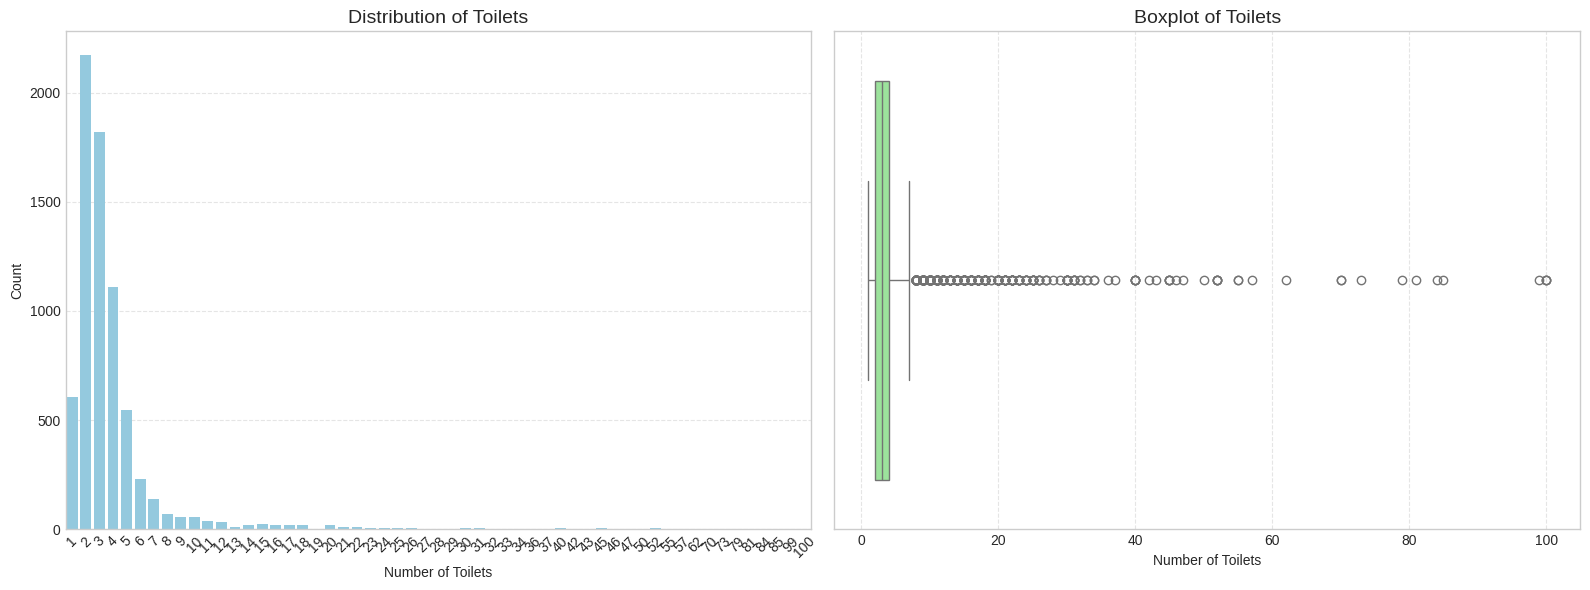

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Countplot for Toilets ---
sns.countplot(data=df, x='toilets', ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of Toilets", fontsize=14)
axes[0].set_xlabel("Number of Toilets")
axes[0].set_ylabel("Count")
axes[0].grid(axis='y', linestyle='--', alpha=0.5)
axes[0].tick_params(axis='x', rotation=45)

# --- Boxplot for Toilets ---
sns.boxplot(x=df['toilets'], ax=axes[1], color='lightgreen')
axes[1].set_title("Boxplot of Toilets", fontsize=14)
axes[1].set_xlabel("Number of Toilets")
axes[1].grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**Summary for Feature: `toilets`**

The distribution of **toilets** is strongly uneven, with the majority of properties containing **1–3 toilets**, which aligns with typical residential housing in Vietnam. However, a noticeable number of listings report extremely high toilet counts—from **20 up to 100 toilets**—which are almost certainly **data errors or scraping noise** rather than real-world values.  

The boxplot further confirms a large presence of **extreme outliers**, while the interquartile range remains very narrow, indicating that the true distribution of toilets is actually compact around small values. These anomalies have a strong impact on statistical measures such as mean and standard deviation.  

For modeling, the feature should be cleaned by removing or clipping extreme values, as unrealistically high toilet counts contribute no meaningful signal and may destabilize predictive models.

**Key Takeaways**
- Most homes have **1–3 toilets**, showing a realistic residential pattern.  
- Many entries report **highly unrealistic values (20–100 toilets)** → strong indicators of **outlier noise**.  
- Boxplots reveal a tight valid range with **significant high-end outliers**.  
- **Clipping or filtering outliers** is necessary before using this feature in modeling.  



#### **2.1.2 Categorical Feature Exploration**

### **2.2 Multivariate Analysis**

The goal of the multivariate analysis is to explore how features interact with one another and how these relationships influence property pricing and market behavior. While univariate analysis helps us understand each variable individually, multivariate analysis reveals **dependencies, correlations, and combined effects** that are critical for building predictive models and uncovering meaningful real estate insights. In this section, we examine feature-to-feature relationships, identify strong and weak correlations, detect multicollinearity, and analyze how groups of variables jointly shape pricing patterns across different property types and market segments.


#### **2.2.1 Bivariate Analysis**


*  **Heatmap of Correlation matrix**

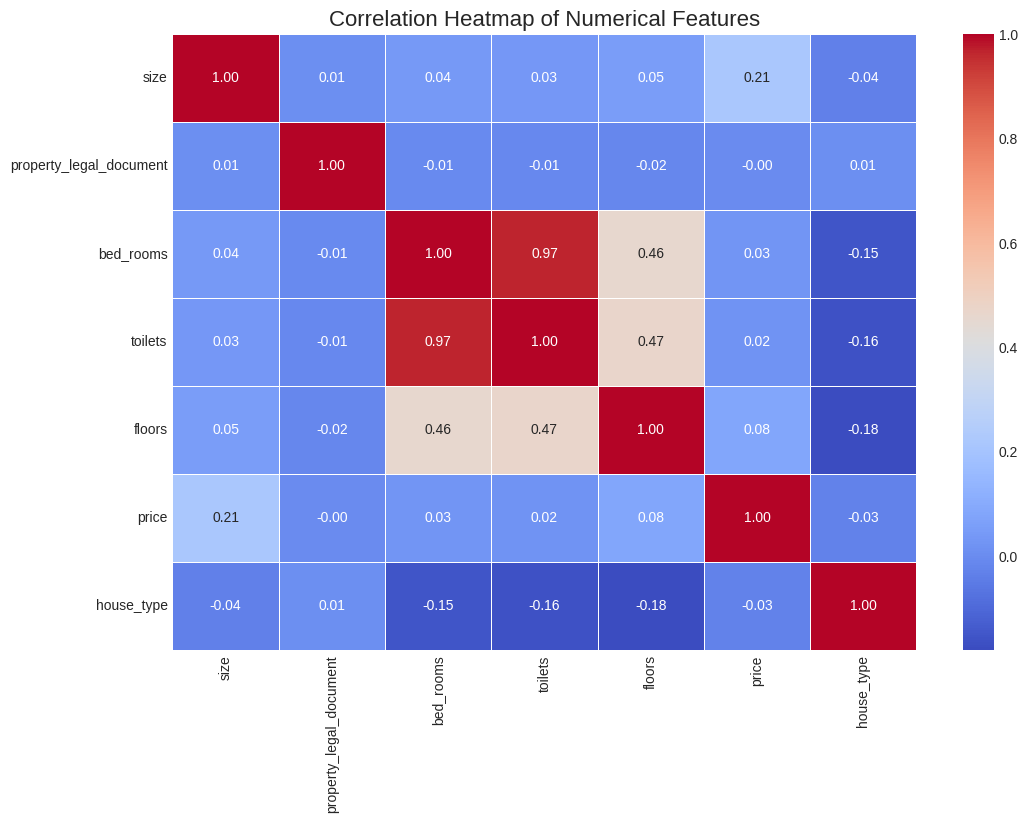

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features only
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(
    numeric_cols.corr(method='pearson'),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()


## **Correlation Analysis — Numerical Features**

The correlation matrix summarizes linear relationships between numerical variables and helps identify **strong dependencies**, **redundant features**, and **key drivers of price**. Overall, most correlations are weak, indicating that the housing market is influenced by multiple interacting factors rather than a single dominant variable.

### **Strong Correlations: `bed_rooms` ↔ `toilets`**
- **Correlation:** ~0.97  
- These two features are almost perfectly correlated.
- Properties with more bedrooms almost always have more bathrooms.

➡️ **Modeling implication:**  
Including both variables may introduce redundancy. Consider keeping one, or using regularization / dimensionality reduction.

### **Moderate Correlations:**
#### **1. `floors` ↔ `bed_rooms` / `toilets`**  
- **Correlation:** ~0.46–0.47  
- Buildings with more floors tend to have more rooms and bathrooms.
- This reflects typical vertical expansion in urban housing.

#### **2. `price` ↔ `size`**  
- **Correlation:** ~0.21  
- Larger properties tend to be more expensive, but the relationship is relatively weak in its raw form.
- This suggests that **location, house type, and legal status** likely play a major role beyond size alone.

### **Weak or Negligible**

#### **Property Legal Document**
- Correlations with all other features are close to **zero**.
- Indicates legal status is largely independent of physical property characteristics.

#### **House Type**
- Shows weak negative correlations with:
  - Bedrooms (~−0.15)
  - Toilets (~−0.16)
  - Floors (~−0.18)
- This reflects differences in design norms across property categories rather than a linear relationship.

### **`price` ↔ Other Structural Features**
- Correlations between price and:
  - Bedrooms (~0.03)
  - Toilets (~0.02)
  - Floors (~0.08)
- These values are surprisingly low, likely due to:
  - Strong non-linear effects
  - Market segmentation
  - Severe outliers in raw price values


## **Key Observations & Implications**

- **No single feature strongly explains price** in linear terms.
- **Bedrooms and toilets are highly interdependent**, indicating potential feature redundancy.
- **Size has the strongest direct linear relationship with price**, but it is still modest.
- Weak correlations suggest that:
  - Non-linear models
  - Feature interactions
  - Log-transformed variables  
  will be more effective than simple linear approaches.

The correlation matrix highlights **strong structural dependencies** between some features, but also confirms that housing prices cannot be explained by any single variable in isolation.


- **Correlation Matrix (Spearman):**

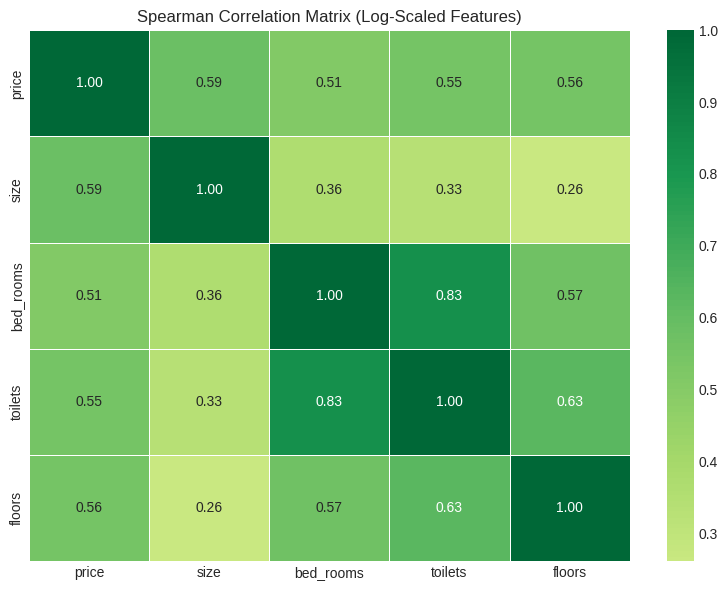

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Log-transform (nên dùng)
df_corr = df.copy()

df_corr['log_price'] = np.log1p(df_corr['price'])
df_corr['log_size'] = np.log1p(df_corr['size'])

corr_features = [
    'price',
    'size',
    'bed_rooms',
    'toilets',
    'floors'
]

spearman_corr = df_corr[corr_features].corr(method='spearman')

plt.figure(figsize=(8, 6))

sns.heatmap(
    spearman_corr,
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    center=0,
    linewidths=0.5
)

plt.title("Spearman Correlation Matrix (Log-Scaled Features)")
plt.tight_layout()
plt.show()


- **Scatter Analysis:**

In [ ]:

# plt.figure(figsize=(16, 12))

# for i, feature in enumerate(features_to_compare, 1):
#     plt.subplot(2, 2, i)
#     sns.regplot(
#         data=df,
#         x=feature,
#         y=target,
#         scatter_kws={'alpha':0.3},
#         line_kws={'color':'red'}
#     )
#     plt.title(f"{feature} vs {target} ", fontsize=14)
#     plt.grid(alpha=0.3)

# plt.tight_layout()
# plt.show()


## 📌 Scatter Plot Analysis (Short Summary)

Across all four scatter plots (size, floors, bedrooms, toilets vs. price), the data shows **no visible correlation**, mainly because the price variable is heavily distorted by extreme outliers. Most valid observations are compressed near zero, while a few unrealistic price values shoot into the tens of millions, flattening the regression line and hiding true relationships. Structural features (like size and room counts) vary normally, but price does not respond accordingly—strong evidence of **data quality issues**.  

To obtain meaningful patterns, price must be **cleaned, clipped, and log-transformed**, after which the scatterplots will reveal realistic trends between property characteristics and pricing.

#### **Single Categorical Feature Analysis**

**Install Vietnamese fonts**

In [ ]:
import matplotlib.pyplot as plt
#!apt-get install fonts-noto
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False    # Fix minus sign rendering


In [ ]:
# Value counts for each column
for column in ['street', 'ward', 'district', 'city']:
    print(f"Value counts for column '{column}': {df[column].count()}")

Value counts for column 'street': 7120
Value counts for column 'ward': 7120
Value counts for column 'district': 7120
Value counts for column 'city': 7120


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ============================================================
# FUNCTION: Group categories into Top-N + Others automatically
# ============================================================
def group_top_categories(df, col, threshold=0.01):
    """
    threshold = tỉ lệ tối thiểu (ví dụ 1% = 0.01)
    Tự động chọn các category chiếm >= threshold và nhóm phần còn lại vào 'Others'
    """
    freq = df[col].value_counts(normalize=True)
    top_categories = freq[freq >= threshold].index

    df[col + "_grouped"] = df[col].apply(lambda x: x if x in top_categories else "Others")
    return df, top_categories


# ============================================================
# FUNCTION: Analyze a categorical feature with optimized grouping
# ============================================================
def analyze_categorical_feature(df, col, target="price", threshold=0.01):
    print(f"===== 🔍 Analyzing Categorical Feature: {col} =====\n")

    # -----------------------------------------
    # STEP 1: Group rare categories automatically
    # -----------------------------------------
    df, top_categories = group_top_categories(df, col, threshold)

    grouped_col = col + "_grouped"

    print(f"📌 Auto-selected Top Categories (Threshold = {threshold*100:.1f}%):")
    print(list(top_categories))
    print(f"\n📌 All other categories are grouped into 'Others'.")

    # -----------------------------------------
    # STEP 2: Value counts (grouped)
    # -----------------------------------------
    print("\n📌 Value Counts (Grouped):")
    display(df[grouped_col].value_counts())

    print("\n📌 Percentage Distribution (Grouped):")
    display(df[grouped_col].value_counts(normalize=True) * 100)

    # -----------------------------------------
    # STEP 3: Visualization
    # -----------------------------------------

    fig, ax = plt.subplots(1, 2, figsize=(18, 7))

    # Countplot
    sns.countplot(
        x=df[grouped_col],
        order=df[grouped_col].value_counts().index,
        palette="Pastel1",
        ax=ax[0]
    )
    ax[0].set_title(f"Countplot of {col} (Grouped)")
    ax[0].set_xlabel(col)
    ax[0].set_ylabel("Count")
    ax[0].tick_params(axis='x', rotation=45)

    # Pie Chart
    df[grouped_col].value_counts().plot.pie(
        autopct="%1.1f%%",
        colors=sns.color_palette("Pastel2", n_colors=df[grouped_col].nunique()),
        ax=ax[1]
    )
    ax[1].set_title(f"Pie Chart of {col} (Grouped)")
    ax[1].set_ylabel("")

    plt.tight_layout()
    plt.show()


    # -----------------------------------------
    # STEP 5: Data quality checks
    # -----------------------------------------
    print("\n🔎 Data Quality Checks:")
    print(f"- Original unique categories: {df[col].nunique()}")
    print(f"- Grouped categories: {df[grouped_col].nunique()}")
    print(f"- Missing values: {df[col].isna().sum()}")
    print(f"- Sample of category names:", df[col].unique()[:10])

    print("\n✨ Completed analysis for:", col)


**Features `city`:**

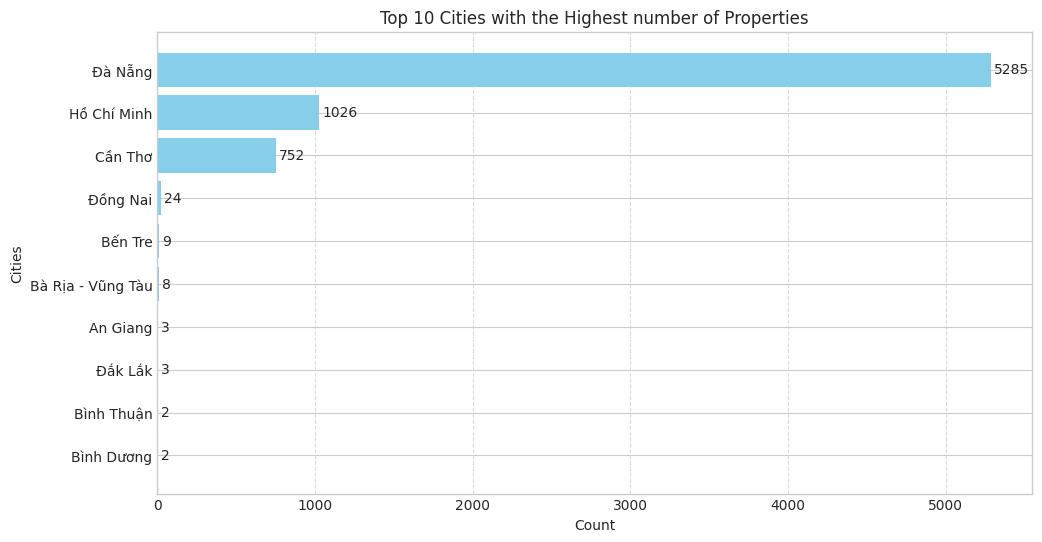

In [ ]:
filtered_city_counts = df['city'].dropna()
filtered_city_counts = filtered_city_counts[filtered_city_counts != 'KXĐ']

city_counts = filtered_city_counts.value_counts()
top_10_cities = city_counts.nlargest(10)
top_10_cities_sorted = top_10_cities.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_cities_sorted.index.str.title(), top_10_cities_sorted.values, color='skyblue')

for bar in bars:
    plt.text(bar.get_width() + 20, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width()}', va='center', ha='left', fontsize=10)

plt.subplots_adjust(right=1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.title('Top 10 Cities with the Highest number of Properties')
plt.xlabel('Count')
plt.ylabel('Cities')

plt.show()


The chart shows the top 10 cities in Vietnam with the highest number of properties. **DaNang** and **Ho Chi Minh** dominate with significantly higher counts, 5,285 and 1,026 respectively, making up the majority of the data. Other cities like **BenTre, CanTho, and Dong Nai** have considerably fewer houses, ranging from 24 to 1026, highlighting a stark contrast between the two major cities and the rest.

===== 🔍 Analyzing Categorical Feature: city =====

📌 Auto-selected Top Categories (Threshold = 1.0%):
['Đà Nẵng', 'Hồ Chí Minh', 'Cần Thơ']

📌 All other categories are grouped into 'Others'.

📌 Value Counts (Grouped):


,count
city_grouped,
Đà Nẵng,5285
Hồ Chí Minh,1026
Cần Thơ,752
Others,57



📌 Percentage Distribution (Grouped):


,proportion
city_grouped,
Đà Nẵng,74
Hồ Chí Minh,14
Cần Thơ,11
Others,1


/tmp/ipython-input-1645283750.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


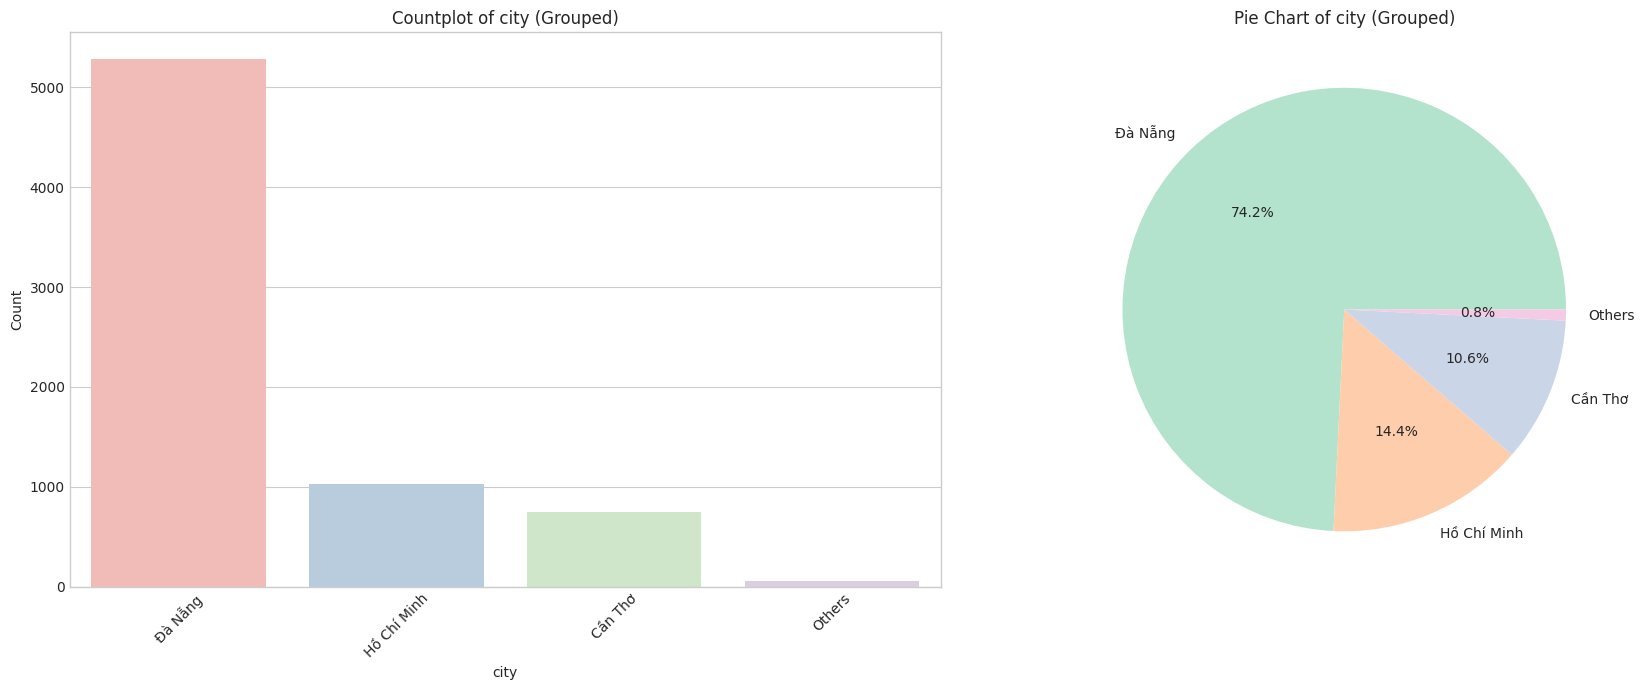


🔎 Data Quality Checks:
- Original unique categories: 14
- Grouped categories: 4
- Missing values: 0
- Sample of category names: ['Đà Nẵng' 'Cần Thơ' 'Hồ Chí Minh' 'Bến Tre' 'Đồng Nai' 'Đắk Lắk'
 'Bà Rịa - Vũng Tàu' 'An Giang' 'Cà Mau' 'Bình Thuận']

✨ Completed analysis for: city


In [ ]:
analyze_categorical_feature(df, "city", target="price", threshold=0.01)


**Features `district`:**

===== 🔍 Analyzing Categorical Feature: district =====

📌 Auto-selected Top Categories (Threshold = 1.0%):
['Hải Châu', 'Thanh Khê', 'Ngũ Hành Sơn', 'Sơn Trà', 'Cẩm Lệ', 'Ninh Kiều', 'Liên Chiểu', 'Cái Răng', 'Bình Tân', '12', 'Tân Phú', 'Gò Vấp', 'Tân Bình']

📌 All other categories are grouped into 'Others'.

📌 Value Counts (Grouped):


,count
district_grouped,
Hải Châu,1706
Thanh Khê,1073
Ngũ Hành Sơn,752
Sơn Trà,719
Others,705
Cẩm Lệ,579
Ninh Kiều,536
Liên Chiểu,439
Cái Răng,131



📌 Percentage Distribution (Grouped):


,proportion
district_grouped,
Hải Châu,24
Thanh Khê,15
Ngũ Hành Sơn,11
Sơn Trà,10
Others,10
Cẩm Lệ,8
Ninh Kiều,8
Liên Chiểu,6
Cái Răng,2


/tmp/ipython-input-1645283750.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


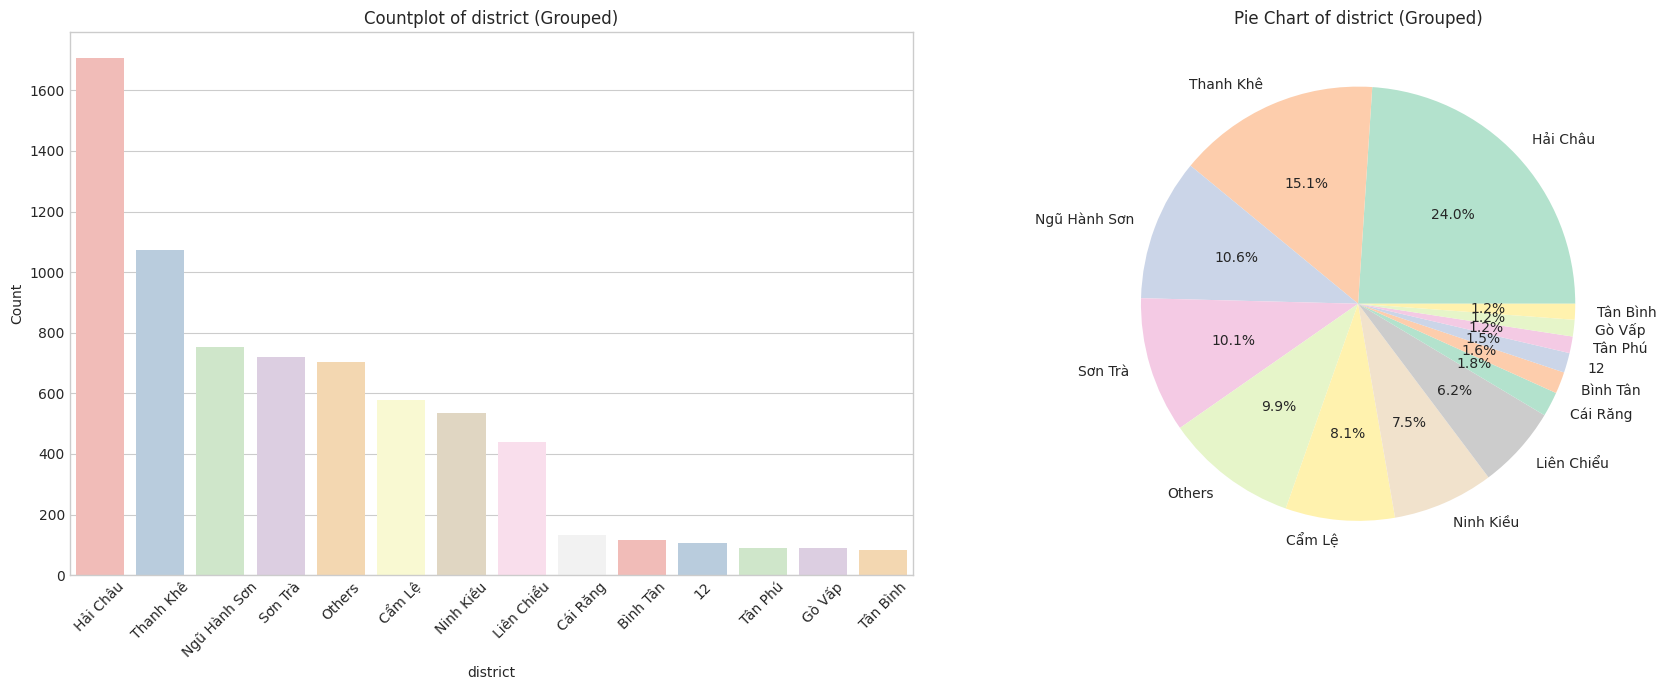


🔎 Data Quality Checks:
- Original unique categories: 64
- Grouped categories: 14
- Missing values: 0
- Sample of category names: ['Liên Chiểu' 'Ngũ Hành Sơn' 'Thanh Khê' 'Sơn Trà' 'Cẩm Lệ' 'Hải Châu'
 'Hoà Vang' 'Ninh Kiều' 'Cái Răng' 'Bình Thuỷ']

✨ Completed analysis for: district


In [ ]:
analyze_categorical_feature(df, "district", target="price", threshold=0.01)


**Features `ward`:**


===== 🔍 Analyzing Categorical Feature: ward =====

📌 Auto-selected Top Categories (Threshold = 1.0%):
['Hòa Cường Bắc', 'Hòa Cường Nam', 'Mỹ An', 'Khuê Trung', 'Hòa Minh', 'Hòa Khê', 'Khuê Mỹ', 'Hòa Hải', 'An Hải Bắc', 'Phước Mỹ', 'An Khánh', 'Chính Gián', 'Hòa Thuận Tây', 'An Khê', 'Bình Thuận', 'Vĩnh Trung', 'Hòa An', 'Hòa Xuân', 'An Hải Đông', 'Thanh Bình', 'Nại Hiên Đông', 'Thạc Gián', 'Hòa Thuận Đông', 'Thuận Phước', 'An Hải Tây', 'Thanh Khê Đông', 'Tam Thuận', 'Thạch Thang', 'Thanh Khê Tây', 'Xuân Hà', 'Hải Châu 1']

📌 All other categories are grouped into 'Others'.

📌 Value Counts (Grouped):


,count
ward_grouped,
Others,2474
Hòa Cường Bắc,390
Hòa Cường Nam,366
Mỹ An,283
Khuê Trung,239
Hòa Minh,234
Hòa Khê,199
Khuê Mỹ,195
Hòa Hải,187



📌 Percentage Distribution (Grouped):


,proportion
ward_grouped,
Others,35
Hòa Cường Bắc,5
Hòa Cường Nam,5
Mỹ An,4
Khuê Trung,3
Hòa Minh,3
Hòa Khê,3
Khuê Mỹ,3
Hòa Hải,3


/tmp/ipython-input-1645283750.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


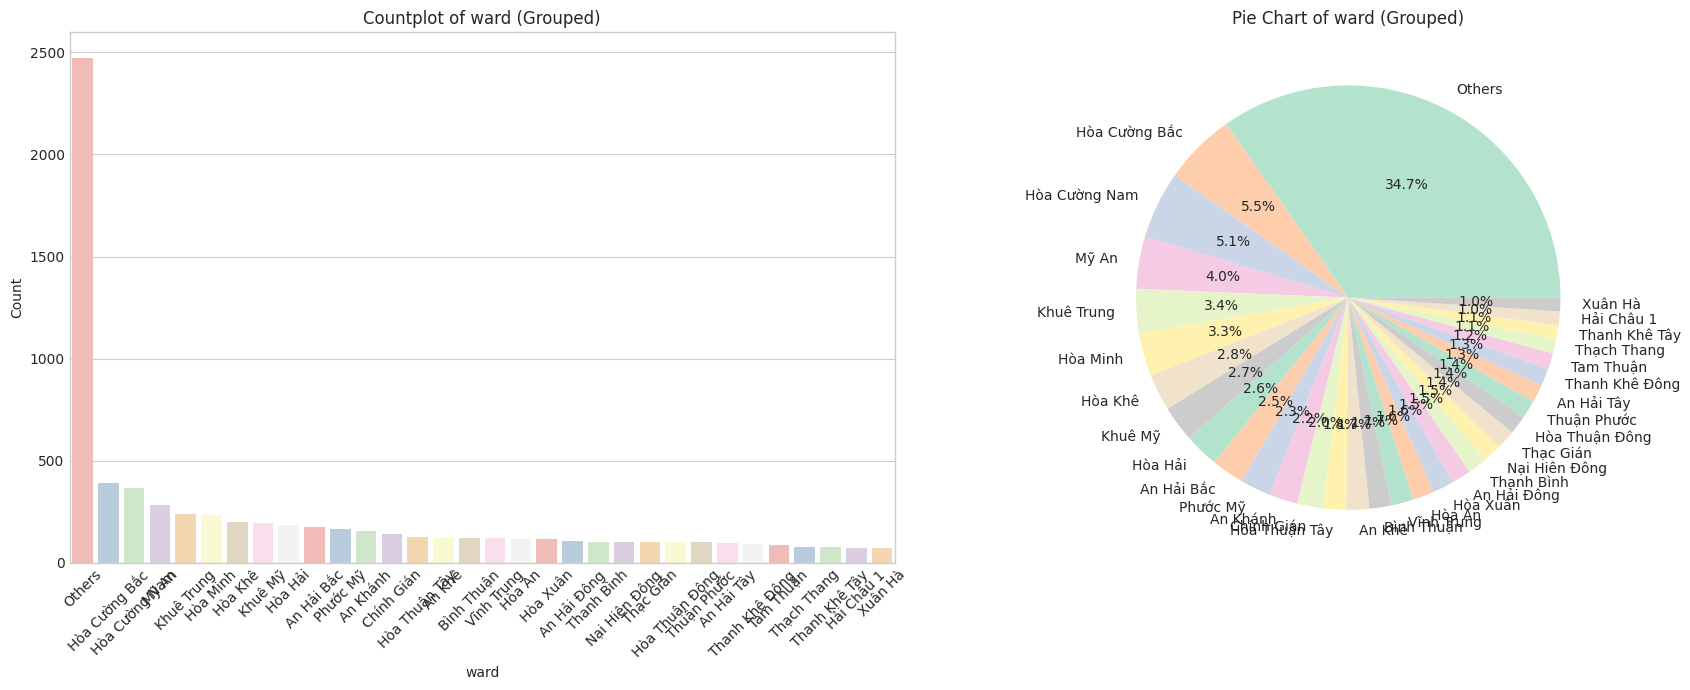


🔎 Data Quality Checks:
- Original unique categories: 241
- Grouped categories: 32
- Missing values: 0
- Sample of category names: ['Hòa Minh' 'Bắc Phú Mỹ' 'Hòa Hiệp Nam' 'An Khê' 'Tân Chính' 'Chính Gián'
 'An Hải Bắc' 'Mỹ An' 'Phước Mỹ' 'An Hải Đông']

✨ Completed analysis for: ward


In [ ]:
analyze_categorical_feature(df, "ward", target="price", threshold=0.01)


**Features `street`:**

===== 🔍 Analyzing Categorical Feature: street =====

📌 Auto-selected Top Categories (Threshold = 0.5%):
['Hoàng Diệu', 'Trần Cao Vân', 'Nguyễn Văn Cừ', 'Điện Biên Phủ', 'Võ Nguyên Giáp', 'Cách Mạng Tháng 8', 'Núi Thành', 'Trần Hưng Đạo', 'Hà Huy Tập', 'Trường Sa', 'Trưng Nữ Vương', '2 Tháng 9', 'Ông Ích Khiêm', 'Nguyễn Hữu Thọ', 'Tiểu La', 'Tôn Đản', '3 Tháng 2', 'Nguyễn Phước Nguyên', 'Nguyễn Tri Phương', 'Hùng Vương', 'Nguyễn Văn Linh', 'Trường Chinh', 'Song Hào', 'Nguyễn Tất Thành', 'Lê Đình Lý', 'Quốc Lộ 91B', 'Đống Đa', 'Quang Trung', 'Âu Cơ', 'Phan Thanh', 'Hoá Sơn 10', 'Tô Hiệu', 'Thái Thị Bôi', 'Cù Chính Lan']

📌 All other categories are grouped into 'Others'.

📌 Value Counts (Grouped):


,count
street_grouped,
Others,4954
Hoàng Diệu,139
Trần Cao Vân,127
Nguyễn Văn Cừ,127
Điện Biên Phủ,104
Võ Nguyên Giáp,98
Cách Mạng Tháng 8,89
Núi Thành,83
Trần Hưng Đạo,76



📌 Percentage Distribution (Grouped):


,proportion
street_grouped,
Others,70
Hoàng Diệu,2
Trần Cao Vân,2
Nguyễn Văn Cừ,2
Điện Biên Phủ,1
Võ Nguyên Giáp,1
Cách Mạng Tháng 8,1
Núi Thành,1
Trần Hưng Đạo,1


/tmp/ipython-input-1645283750.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


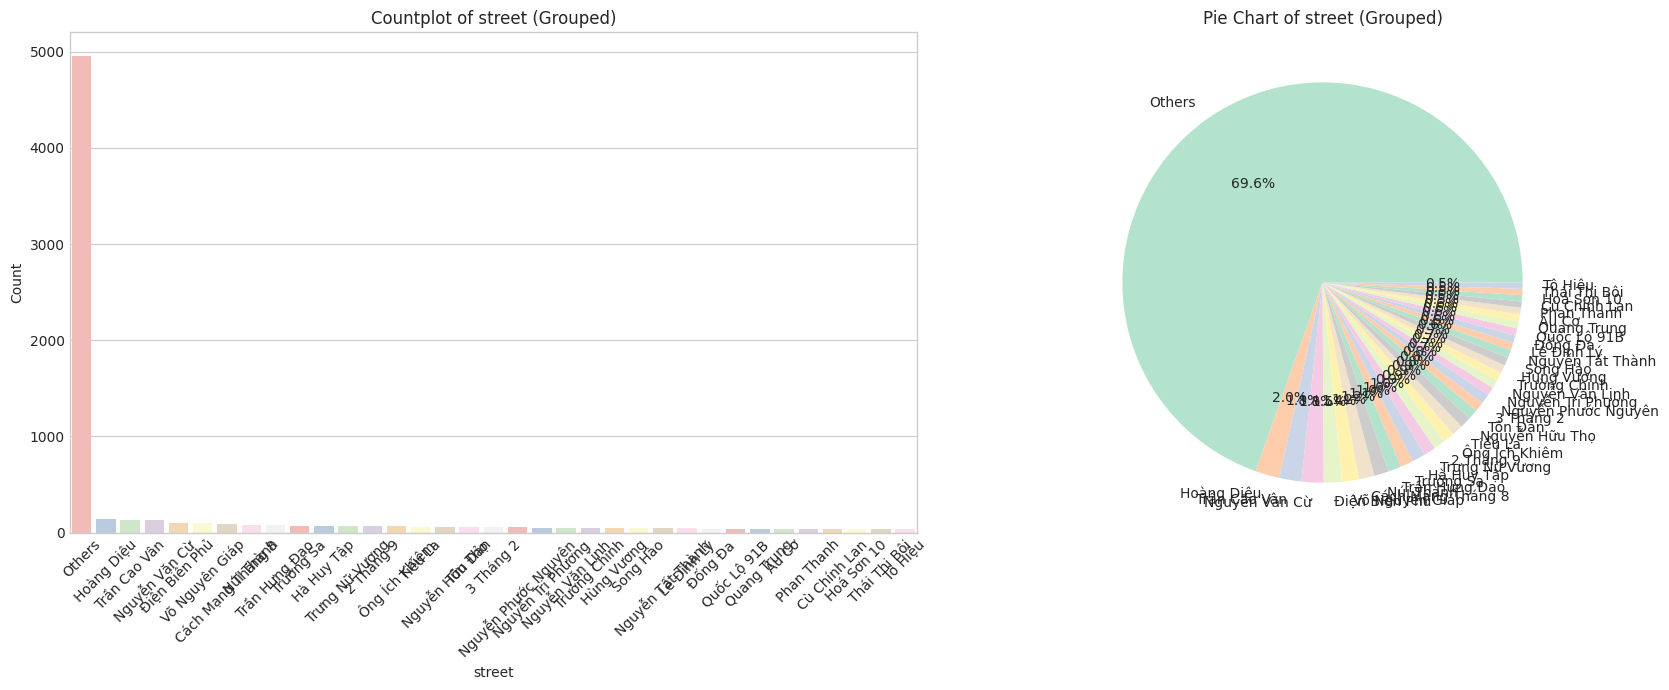


🔎 Data Quality Checks:
- Original unique categories: 1450
- Grouped categories: 35
- Missing values: 0
- Sample of category names: ['Tôn Đức Thắng' 'Nguyễn Văn Thoại' 'Xuân Thiều 8' 'Lê Duy Đình' 'Lê Duẩn'
 'Võ Văn Tần' 'Nguyễn Thúy' 'Lê Ninh' 'An Thượng 1' 'Võ Nguyên Giáp']

✨ Completed analysis for: street


In [ ]:
analyze_categorical_feature(df, "street", target="price", threshold=0.005)


#### **2.2.2 Multivariate Analysis**

**Distribution of `price_per_m^2`:**


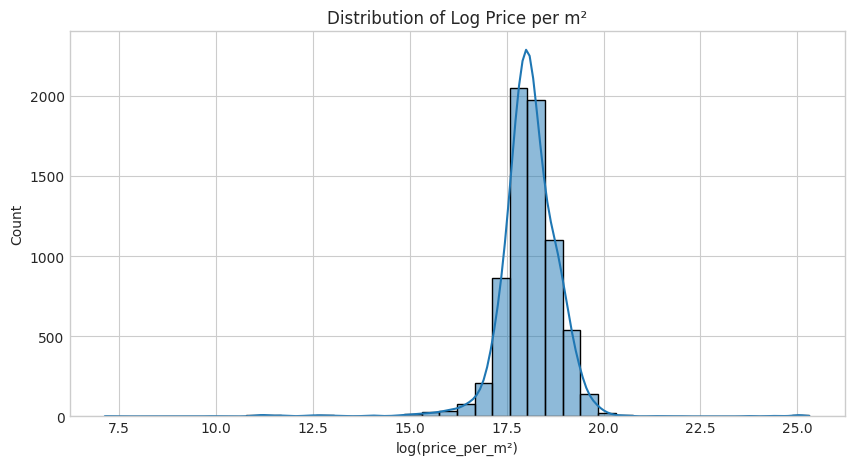

In [ ]:
df["price_per_m2"] = (df["price"] * 1000000000) / df["size"]

df["log_price_per_m2"] = np.log1p(df["price_per_m2"])

plt.figure(figsize=(10, 5))
sns.histplot(df["log_price_per_m2"], bins=40, kde=True)
plt.title("Distribution of Log Price per m²")
plt.xlabel("log(price_per_m²)")
plt.show()


### **Analysis of Log Price per m² Distribution (VND)**

This chart illustrates the distribution of **log-transformed price per square meter (VND/m²)**. By normalizing price by area and applying a log transformation, the visualization provides a clearer view of **true market valuation density**, largely removing the distortions caused by property size and extreme prices.

**Key insights:**
- **Well-Behaved Distribution:** The log(price per m²) follows a **tight, near-normal distribution**, indicating that unit price is much more stable than raw total price.
- **Strong Central Concentration:** Most observations cluster tightly around a narrow log range (approximately **17.5–18.5**), representing the dominant market valuation band for residential properties.
- **Reduced Impact of Outliers:** Unlike raw price or raw price-per-m², extreme values are heavily compressed. This suggests that **unit price is inherently more robust** and less sensitive to large properties or listing errors.
- **Smooth KDE Curve:** The KDE line is unimodal and symmetric, confirming a **single dominant pricing regime** rather than multiple disconnected markets.
- **Extreme Tails:** A small number of observations appear at very low or very high log values, likely reflecting:
  - Data noise or scraping errors
  - Exceptional locations (e.g., prime CBD streets or special-use properties)

➡️ **Compared to total price, log(price per m²) provides a much cleaner signal of market value.**

#### **Modeling Implications**
- Log(price per m²) is an **excellent candidate target or auxiliary feature**.
- It naturally controls for size effects and highlights **location and quality-driven value**.
- Minimal skewness and limited outliers make it suitable for:
  - Linear models
  - Tree-based models
  - Clustering and segmentation tasks

📌 ***In summary:***  
The log-transformed price per m² reveals a stable, well-structured pricing landscape and is one of the most reliable representations of housing value in the dataset.


**Categorical featues with other features**

In [ ]:
def create_grouped_category(
    df,
    col,
    top_n=None,
    threshold=0.01,
    others_label="Others",
    new_col_name=None,
    verbose=True
):
    """
    Auto-create grouped categorical feature:
    - Keep top categories based on threshold or top_n
    - Group remaining categories into 'Others'
    """

    if new_col_name is None:
        new_col_name = f"{col}_grouped"

    # Safety checks
    if col not in df.columns:
        raise ValueError(f"Column '{col}' does not exist in DataFrame")

    if top_n is None and threshold is None:
        raise ValueError("You must provide either top_n or threshold")

    # Value distribution
    value_counts = df[col].value_counts(normalize=True)

    # Select categories to keep
    if threshold is not None:
        keep_categories = value_counts[value_counts >= threshold].index
        method_used = f"threshold >= {threshold*100:.1f}%"
    else:
        keep_categories = value_counts.nlargest(top_n).index
        method_used = f"top {top_n}"

    # Create grouped column
    df[new_col_name] = df[col].where(
        df[col].isin(keep_categories),
        others_label
    )

    if verbose:
        print(f"✅ Created '{new_col_name}' from '{col}'")
        print(f"   Method: {method_used}")
        print(f"   Kept categories: {len(keep_categories)}")
        print(f"   Others count: {(df[new_col_name] == others_label).sum()}")

    return df


**The relationship between `city` and **other features****
- **`city` and `size`:**

In [ ]:
df = create_grouped_category(
    df,
    col="city",
    threshold=0.01
)


✅ Created 'city_grouped' from 'city'
   Method: threshold >= 1.0%
   Kept categories: 3
   Others count: 57


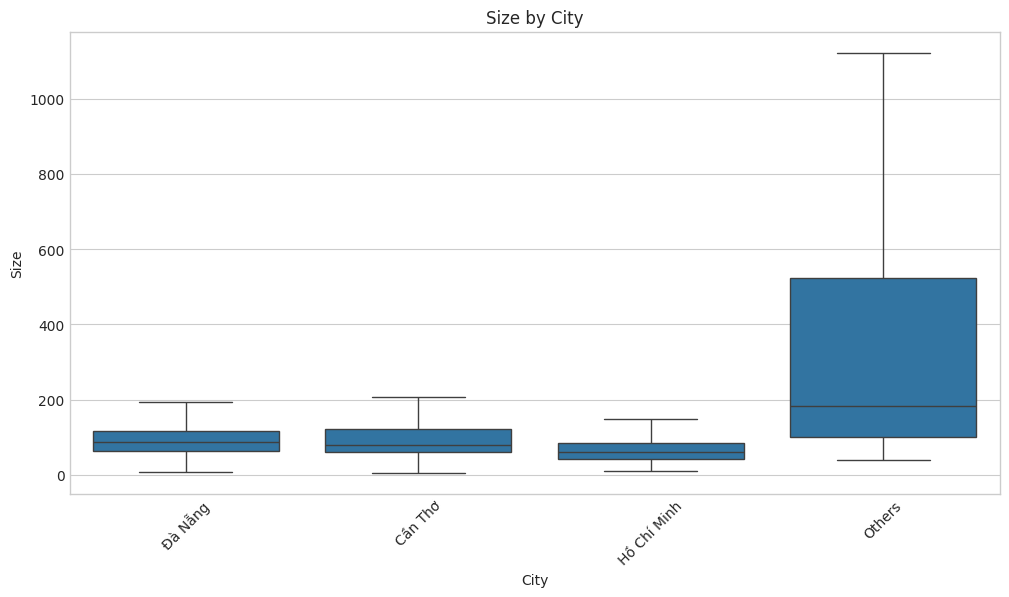

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="city_grouped",
    y="size",
    data=df,
    showfliers=False
)
plt.title("Size by City")
plt.xlabel("City")
plt.ylabel("Size")
plt.xticks(rotation=45)
plt.show()


- **`city` and `price`:**

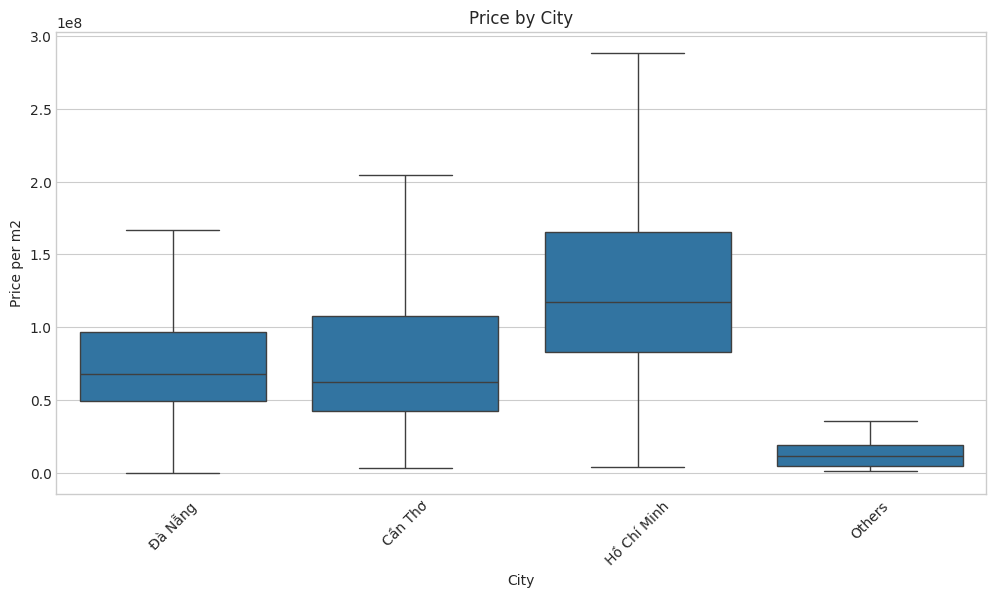

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="city_grouped",
    y="price_per_m2",
    data=df,
    showfliers=False
)
plt.title("Price by City")
plt.xlabel("City")
plt.ylabel("Price per m2")
plt.xticks(rotation=45)
plt.show()


**The relationship between `district` and other features**

- `district` and `price`:


In [ ]:
df = create_grouped_category(
    df,
    col="district",
    top_n=15
)

✅ Created 'district_grouped' from 'district'
   Method: threshold >= 1.0%
   Kept categories: 13
   Others count: 705


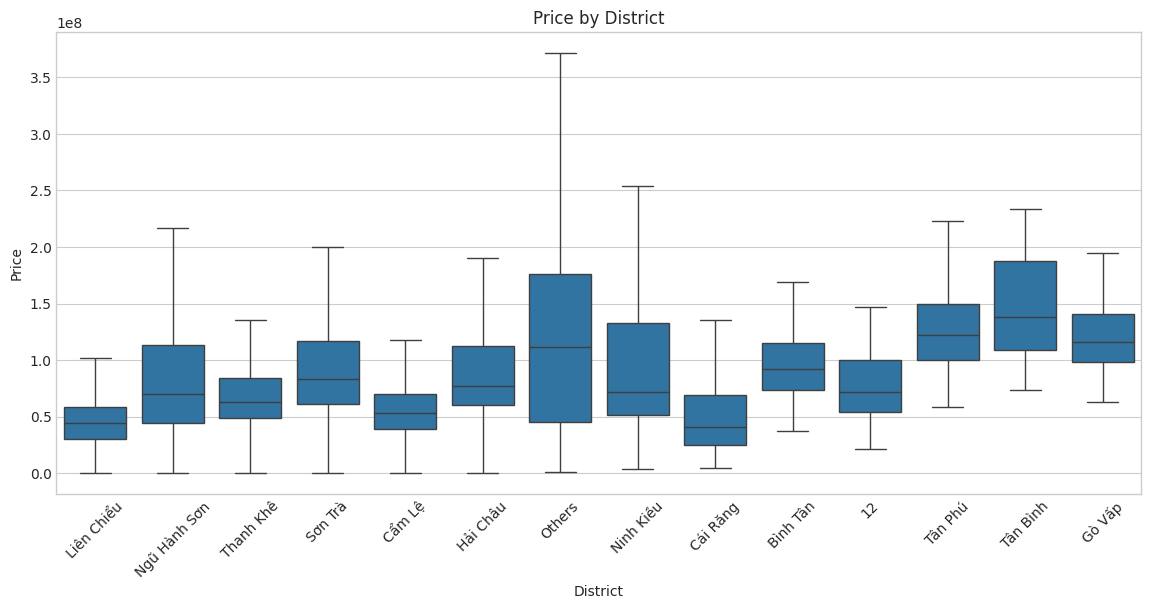

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    x="district_grouped",
    y="price_per_m2",
    data=df,
    showfliers=False
)
plt.title("Price by District")
plt.xlabel("District")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()


**The relationship between `street` and `price`**

In [ ]:
df = create_grouped_category(
    df,
    col="street",
    threshold=0.02
)

✅ Created 'street_grouped' from 'street'
   Method: threshold >= 2.0%
   Kept categories: 0
   Others count: 7120


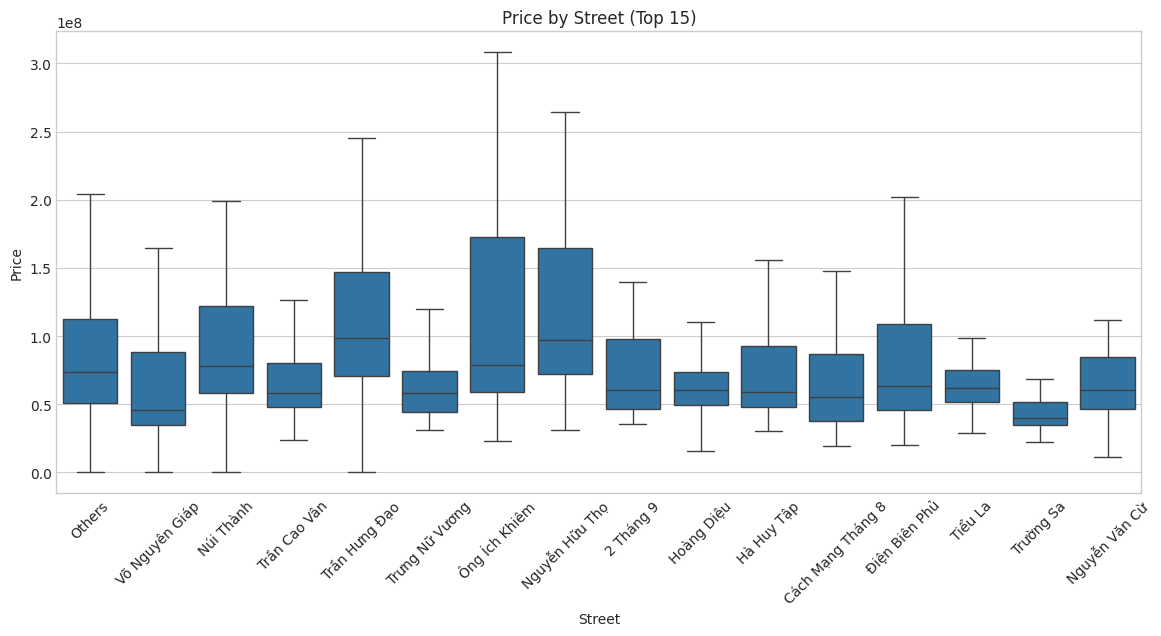

In [ ]:
top_streets = df["street"].value_counts().nlargest(15).index
df["street_grouped"] = df["street"].where(df["street"].isin(top_streets), "Others")

plt.figure(figsize=(14, 6))
sns.boxplot(
    x="street_grouped",
    y="price_per_m2",
    data=df,
    showfliers=False
)
plt.title("Price by Street (Top 15)")
plt.xlabel("Street")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()


**The relationship between `property_legal_document` and `price`**

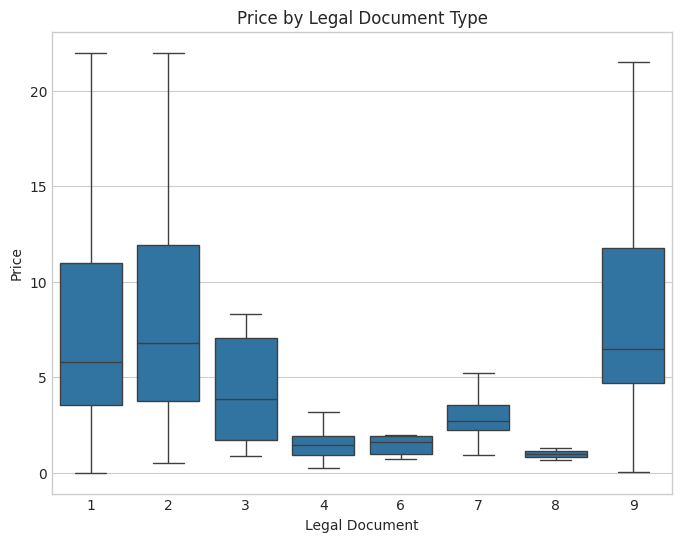

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x="property_legal_document",
    y="price",
    data=df,
    showfliers=False
)
plt.title("Price by Legal Document Type")
plt.xlabel("Legal Document")
plt.ylabel("Price")
plt.show()


##### **2.2.2.1 Pairplot**

##### **2.2.2.2 Feature Interaction Analysis**


- **`bed_rooms` and `toilets` and `floors`:**

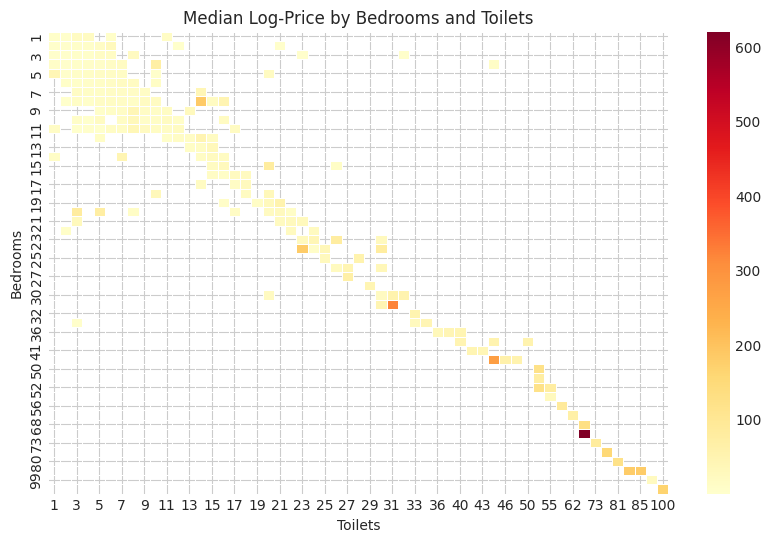

In [ ]:
pivot = (
    df
    .groupby(["bed_rooms", "toilets"])["price"]
    .median()
    .unstack()
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap="YlOrRd", linewidths=0.5)
plt.title("Median Log-Price by Bedrooms and Toilets")
plt.xlabel("Toilets")
plt.ylabel("Bedrooms")
plt.show()


The heatmap shows that **price increases with more bedrooms and toilets**, but not linearly.

- Highest prices appear in **balanced combinations** (e.g. 3–4 bedrooms with 3–4 toilets).
- Adding toilets beyond a certain point does **not consistently increase price**, especially when bedrooms remain unchanged.
- This suggests a **diminishing return effect**: excessive bathrooms without corresponding room or size increases add limited value.

Optimal room-to-toilet balance matters more than sheer quantity.


- **`floors` and `size` buckets and `price`:**

In [ ]:
df["size_bucket"] = pd.cut(
    df["size"],
    bins=[0, 50, 120, df["size"].quantile(0.99)],
    labels=["Small", "Medium", "Large"]
)


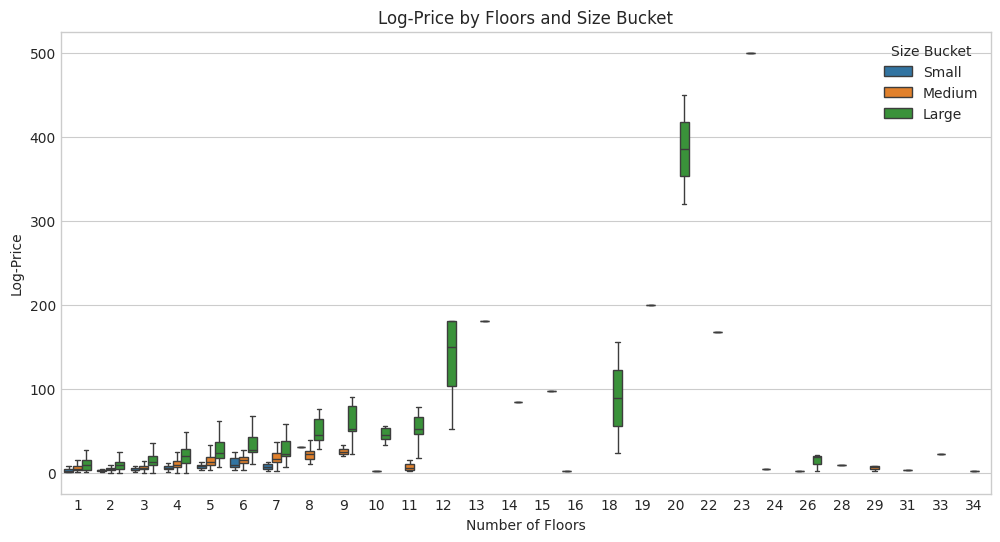

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="floors",
    y="price",
    hue="size_bucket",
    data=df,
    showfliers=False
)
plt.title("Log-Price by Floors and Size Bucket")
plt.xlabel("Number of Floors")
plt.ylabel("Log-Price")
plt.legend(title="Size Bucket")
plt.show()


This interaction plot shows that **floors only add value when paired with sufficient size**.

- For **small properties**, additional floors have little to no price impact.
- For **medium-sized homes**, price increases modestly with floors.
- For **large properties**, multi-floor layouts significantly boost price.

-> **Floors act as a price multiplier only when size crosses a minimum threshold**.
Adding floors to small homes yields diminishing returns.

- **Structural importance by house_type**

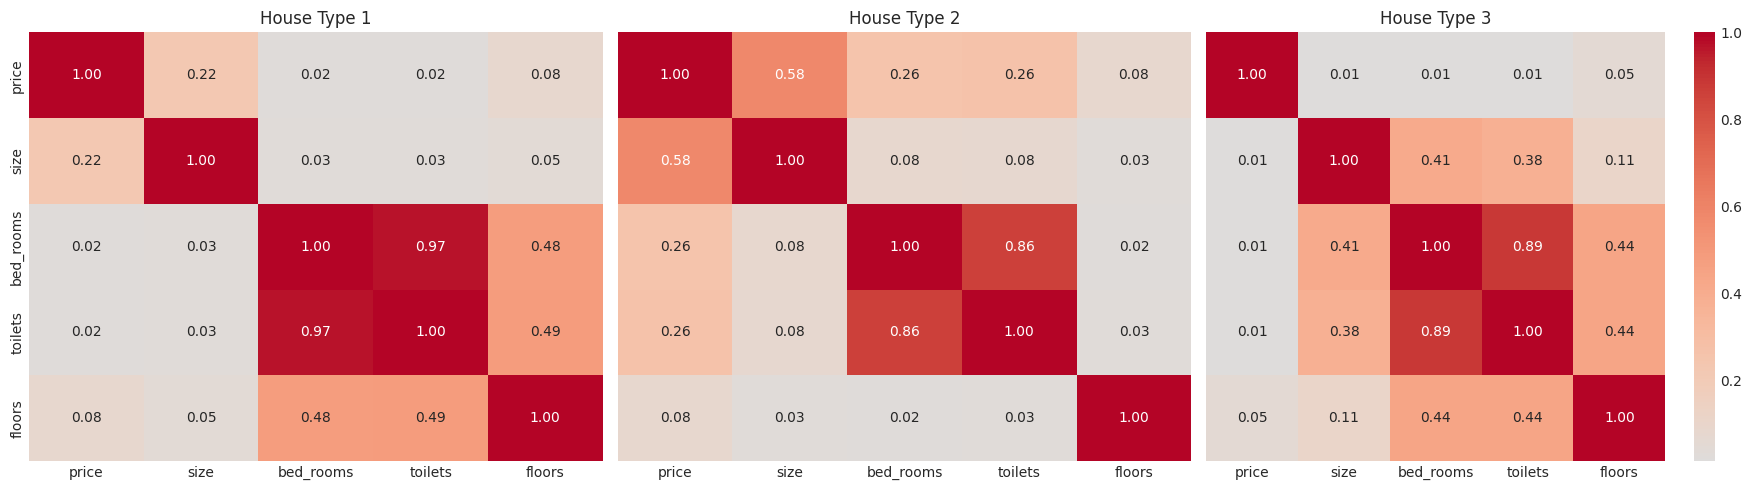

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ["price", "size", "bed_rooms", "toilets", "floors"]

house_types = []
corr_matrices = []

# Collect correlation matrices
for ht in df["house_type"].unique():
    subset = df[df["house_type"] == ht][features].dropna()

    if len(subset) < 50:
        continue  # skip very small samples

    corr = subset.corr(method="pearson")
    house_types.append(ht)
    corr_matrices.append(corr)

# Create horizontal layout
n = len(corr_matrices)
fig, axes = plt.subplots(1, n, figsize=(6 * n, 5), sharey=True)

# Handle case when there is only one matrix
if n == 1:
    axes = [axes]

for ax, ht, corr in zip(axes, house_types, corr_matrices):
    sns.heatmap(
        corr,
        annot=True,
        cmap="coolwarm",
        fmt=".2f",
        center=0,
        ax=ax,
        cbar=ax == axes[-1]
    )
    ax.set_title(f"House Type {ht}")

plt.tight_layout()
plt.show()


## **Correlation Insights by House Type**

#### **House Type 1 — Main Street House**
- **Price vs Size:** Weak positive correlation (~0.22), indicating that larger frontage houses are slightly more expensive, but size alone does not dominate pricing.
- **Structural Consistency:** Bedrooms and toilets are almost perfectly correlated (~0.97), reflecting standardized design patterns.
- **Vertical Expansion:** Floors show moderate correlation with bedrooms and toilets (~0.48–0.49), suggesting multi-story layouts to maximize usable space.

➡️ *Pricing for main street houses is influenced by multiple factors beyond simple size or room count.*

#### **House Type 2 — Alley House**
- **Price vs Size:** Strong correlation (~0.58), showing that area is a key price driver in constrained alley locations.
- **Rooms & Facilities:** Bedrooms and toilets remain highly correlated (~0.86), but floors are largely independent.
- **Compact Design:** Limited vertical and horizontal expansion emphasizes efficient use of space.

➡️ *For alley houses, size is the dominant determinant of price.*

#### **House Type 3 — Villa**
- **Price vs Size:** Almost no correlation (~0.01), indicating that land area alone does not explain villa pricing.
- **Luxury Structure:** Strong relationships between bedrooms, toilets, and floors (~0.38–0.89), reflecting high-end, amenity-rich layouts.
- **Value Drivers:** Pricing likely depends on location, exclusivity, design quality, and neighborhood prestige.

➡️ *Villa prices are driven more by qualitative factors than physical dimensions. Price decoupled from size, dominated by premium and location factors.*


##### **2.2.2.3 Geospatial Insights**

## **Outlier Detection & Treatments**

#### **Data before Handling**

In [ ]:
#sns.pairplot(df[['price', 'size', 'bed_rooms', 'toilets', 'floors']])
#plt.show()


In [ ]:
num_cols = [
    "price", "size", "bed_rooms", "toilets", "floors"
]

df_num = df[num_cols].copy()


In [ ]:
df_num.quantile([0.95, 0.99, 0.995, 0.999])


,price,size,bed_rooms,toilets,floors
1,27,300,10,10,5
1,75,678,23,24,8
1,150,1004,33,34,11
1,4240,3723,77,78,29


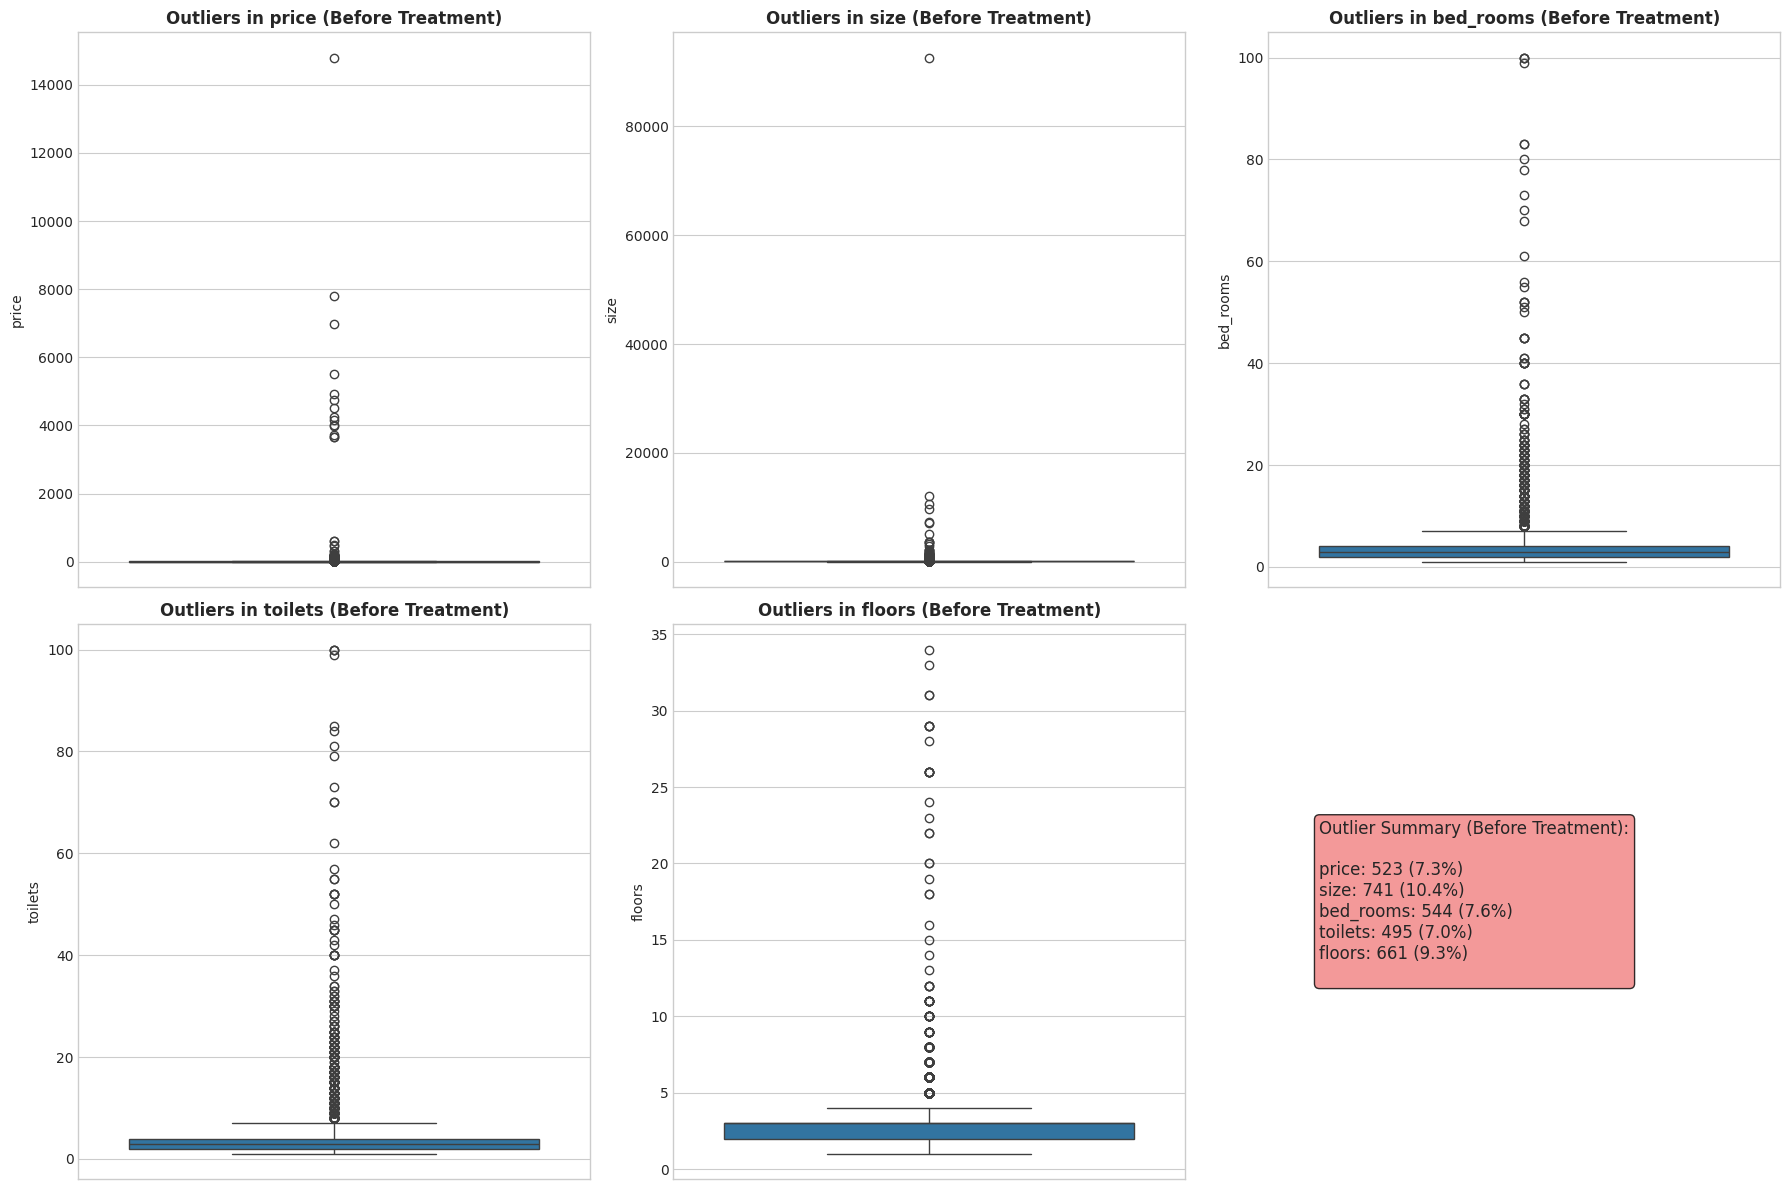

=== QUANTILE ANALYSIS (BEFORE TREATMENT) ===
   price  size  bed_rooms  toilets  floors
1     19   190          6        6       4
1     27   300         10       10       5
1     75   678         23       24       8
1    150  1004         33       34      11
1   4240  3723         77       78      29


In [ ]:
# Visualize outliers before treatment
numerical_cols = ['price', 'size', 'bed_rooms', 'toilets', 'floors']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    # Boxplot to show outliers
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Outliers in {col} (Before Treatment)', fontweight='bold')
    axes[i].set_ylabel(col)

# Summary statistics
axes[5].axis('off')
summary_text = "Outlier Summary (Before Treatment):\n\n"
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_pct = (len(outliers) / len(df)) * 100
    summary_text += f"{col}: {len(outliers)} ({outlier_pct:.1f}%)\n"

axes[5].text(0.1, 0.5, summary_text, transform=axes[5].transAxes,
            fontsize=12, verticalalignment='center',
            bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

plt.tight_layout()
plt.show()

# Quantile analysis
print("=== QUANTILE ANALYSIS (BEFORE TREATMENT) ===")
quantiles = df[numerical_cols].quantile([0.90, 0.95, 0.99, 0.995, 0.999])
print(quantiles)

### **Detect Outliers**

In [ ]:
import numpy as np
from scipy import stats

# ---------- Outlier detection (ANALYSIS ONLY) ----------

def detect_outliers_iqr(data, column, k=1.5):
    """Detect outliers using adjustable IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


def detect_outliers_zscore(data, column, threshold=3):
    """Detect outliers using Z-score (safe version)"""
    clean_col = data[column].dropna()
    z_scores = np.abs(stats.zscore(clean_col))
    return data.loc[clean_col.index[z_scores > threshold]]


print("=== OUTLIER DETECTION SUMMARY (ANALYSIS ONLY) ===")
outlier_summary = {}

for col in numerical_cols:
    out_iqr, lb, ub = detect_outliers_iqr(df, col, k=1.5)
    out_z = detect_outliers_zscore(df, col)

    outlier_summary[col] = {
        "iqr_outliers": len(out_iqr),
        "zscore_outliers": len(out_z),
        "iqr_pct": len(out_iqr) / len(df) * 100,
        "bounds": (lb, ub),
        "minmax": (df[col].min(), df[col].max())
    }

    print(f"\n{col.upper()}")
    print(f"  IQR outliers: {len(out_iqr)} ({outlier_summary[col]['iqr_pct']:.1f}%)")
    print(f"  Z-score outliers: {len(out_z)}")
    print(f"  IQR bounds: [{lb:.2f}, {ub:.2f}]")
    print(f"  Min/Max: [{df[col].min():.2f}, {df[col].max():.2f}]")


=== OUTLIER DETECTION SUMMARY (ANALYSIS ONLY) ===

PRICE
  IQR outliers: 523 (7.3%)
  Z-score outliers: 14
  IQR bounds: [-7.75, 22.25]
  Min/Max: [0.00, 14798.00]

SIZE
  IQR outliers: 741 (10.4%)
  Z-score outliers: 10
  IQR bounds: [-15.00, 185.00]
  Min/Max: [5.00, 92651.80]

BED_ROOMS
  IQR outliers: 544 (7.6%)
  Z-score outliers: 115
  IQR bounds: [-1.00, 7.00]
  Min/Max: [1.00, 100.00]

TOILETS
  IQR outliers: 495 (7.0%)
  Z-score outliers: 123
  IQR bounds: [-1.00, 7.00]
  Min/Max: [1.00, 100.00]

FLOORS
  IQR outliers: 661 (9.3%)
  Z-score outliers: 65
  IQR bounds: [0.50, 4.50]
  Min/Max: [1.00, 34.00]


### **Outlier Analysis by Feature**

### **Treatment Strategy**

=== OUTLIER TREATMENT SUMMARY ===
Original size: 7,120
After treatment: 5,592
Total removed: 1,528 (21.5%)
=== OUTLIER REMOVAL RESULTS ===
Original dataset size: 7,120
After outlier removal: 5,592
Total removed: 1,528 records (21.5%)

Removal details by feature:
price_rule: 309 records removed
size_rule: 432 records removed
floors_rule: 120 records removed
price_iqr: 149 records removed
size_iqr: 68 records removed
bed_rooms_iqr: 270 records removed
toilets_iqr: 24 records removed
floors_iqr: 156 records removed


/tmp/ipython-input-4181464106.py:84: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,1].boxplot([df['price'], df_clean['price']], labels=['Original', 'Treated'])
/tmp/ipython-input-4181464106.py:97: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,1].boxplot([df['size'], df_clean['size']], labels=['Original', 'Treated'])
/tmp/ipython-input-4181464106.py:110: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2,1].boxplot([df['bed_rooms'], df_clean['bed_rooms']], labels=['Original', 'Treated'])


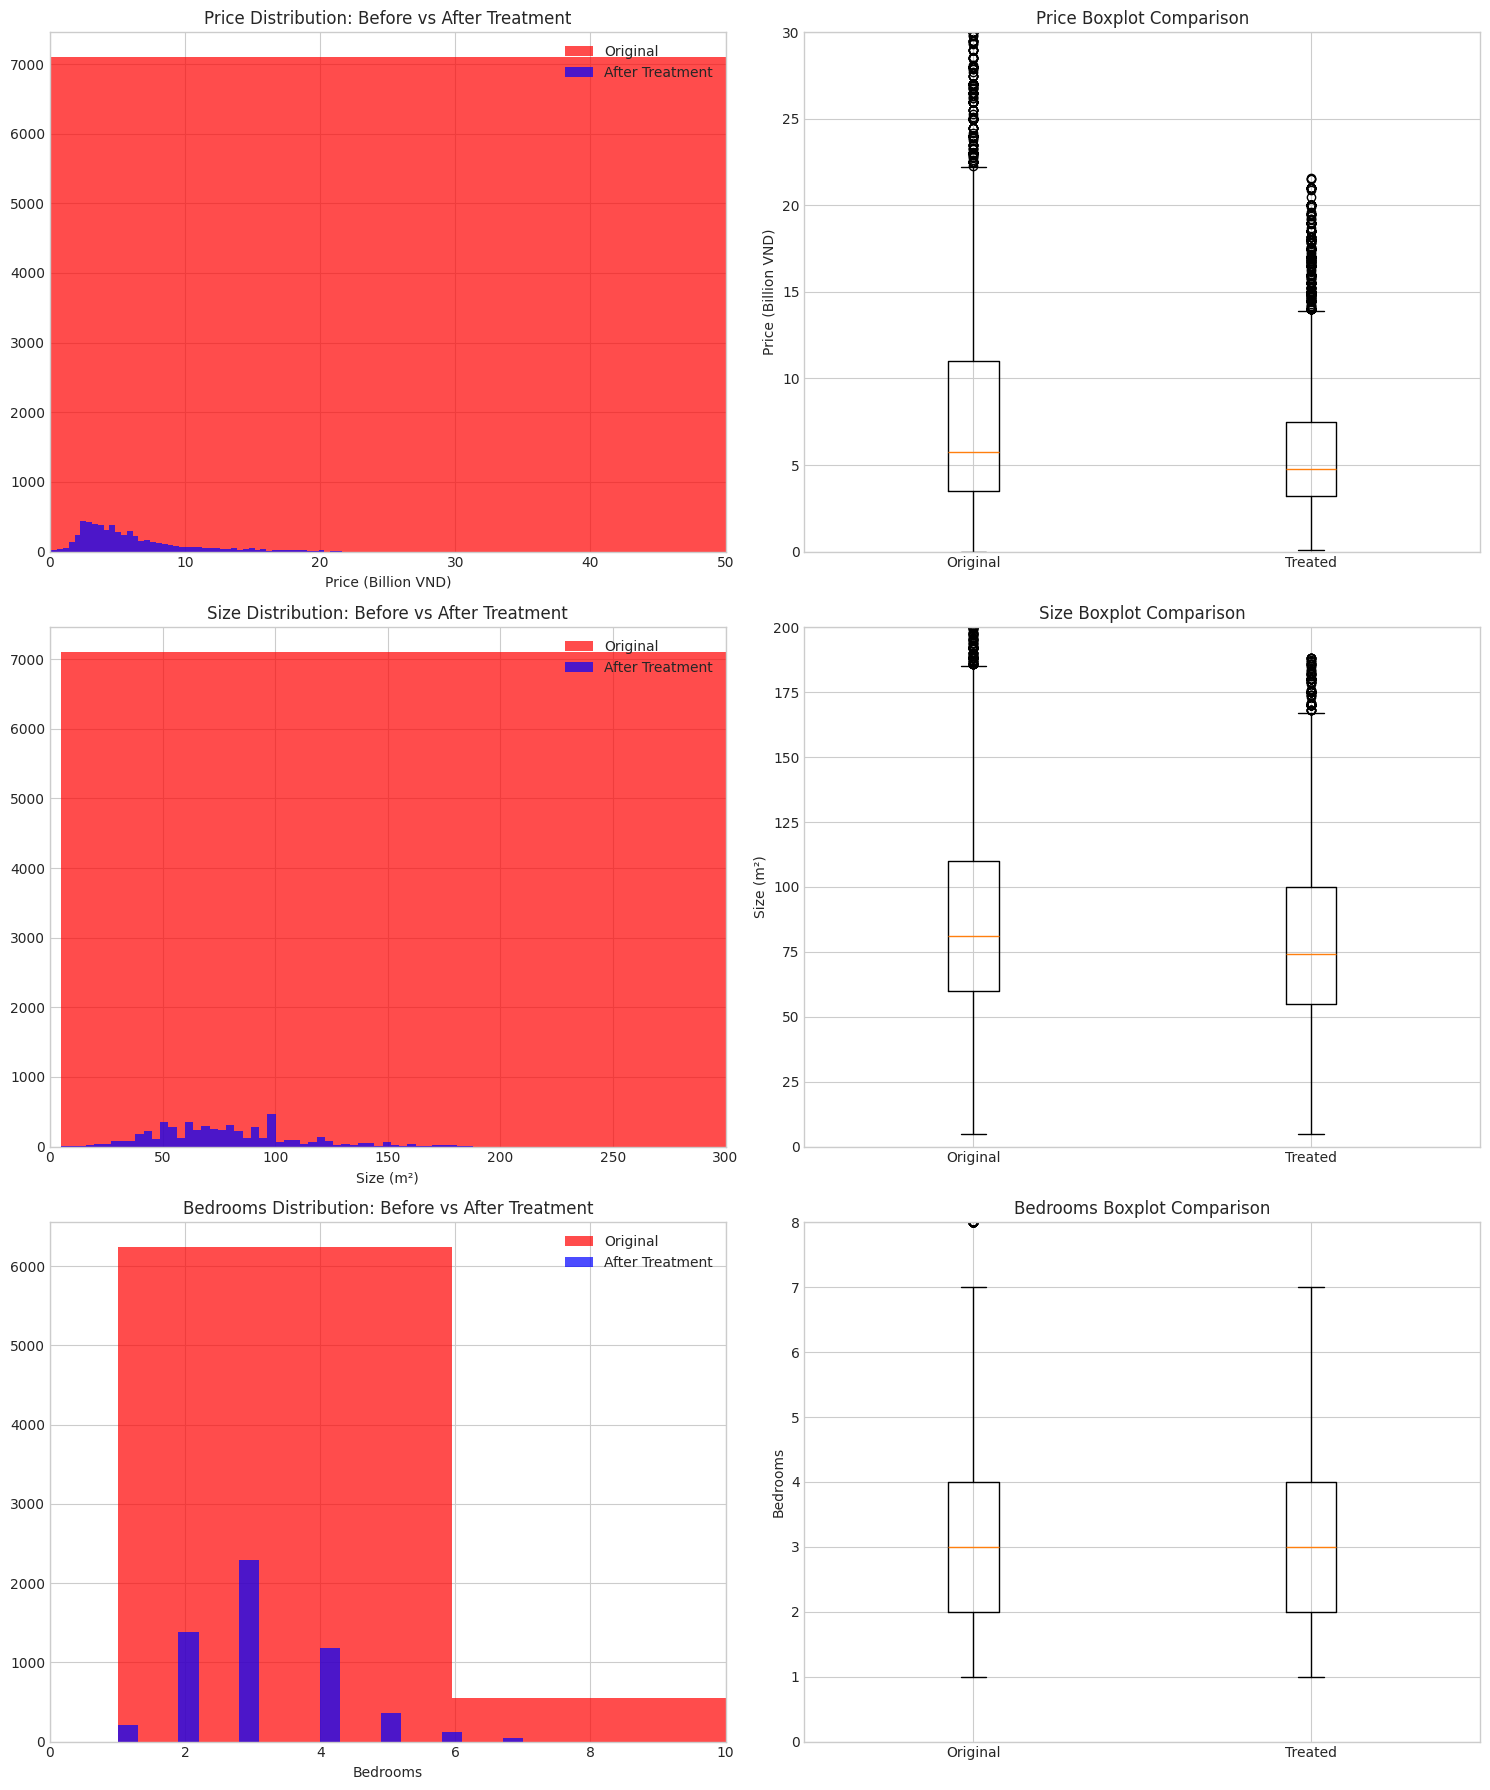

In [ ]:
def apply_custom_outlier_treatment(data):
    df_treated = data.copy()
    removal_log = {}

    original_size = len(df_treated)

    # ===== 1. DOMAIN RULES FIRST =====
    rules = {
        "price": (0.1, 30),
        "size": (5, 200),
        "floors": (1, 6)
    }

    for col, (lo, hi) in rules.items():
        before = len(df_treated)
        df_treated = df_treated[(df_treated[col] >= lo) & (df_treated[col] <= hi)]

        removal_log[f"{col}_rule"] = {
            "removed": before - len(df_treated),
            "bounds": (lo, hi)
        }

    # ===== 2. SOFT IQR =====
    iqr_k = {
        "price": 2.5,
        "size": 2.0,
        "bed_rooms": 1.5,
        "toilets": 1.5,
        "floors": 1.5
    }

    for col in numerical_cols:
        before = len(df_treated)

        Q1 = df_treated[col].quantile(0.25)
        Q3 = df_treated[col].quantile(0.75)
        IQR = Q3 - Q1
        k = iqr_k.get(col, 1.5)

        lower = Q1 - k * IQR
        upper = Q3 + k * IQR

        df_treated = df_treated[
            (df_treated[col] >= lower) & (df_treated[col] <= upper)
        ]

        removal_log[f"{col}_iqr"] = {
            "k": k,
            "removed": before - len(df_treated),
            "bounds": (lower, upper)
        }

    print("=== OUTLIER TREATMENT SUMMARY ===")
    print(f"Original size: {original_size:,}")
    print(f"After treatment: {len(df_treated):,}")
    print(f"Total removed: {original_size - len(df_treated):,} "
          f"({(original_size - len(df_treated)) / original_size * 100:.1f}%)")

    return df_treated, removal_log

# Apply treatment
df_clean, removal_stats = apply_custom_outlier_treatment(df)

print(f"=== OUTLIER REMOVAL RESULTS ===")
print(f"Original dataset size: {len(df):,}")
print(f"After outlier removal: {len(df_clean):,}")
print(f"Total removed: {len(df) - len(df_clean):,} records ({((len(df) - len(df_clean))/len(df)*100):.1f}%)")

print(f"\nRemoval details by feature:")
for col, stats in removal_stats.items():
    print(f"{col}: {stats['removed']} records removed")

# Compare distributions before and after
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Price comparison
axes[0,0].hist(df['price'], bins=50, alpha=0.7, label='Original', color='red')
axes[0,0].hist(df_clean['price'], bins=50, alpha=0.7, label='After Treatment', color='blue')
axes[0,0].set_title('Price Distribution: Before vs After Treatment')
axes[0,0].set_xlabel('Price (Billion VND)')
axes[0,0].legend()
axes[0,0].set_xlim(0, 50)

axes[0,1].boxplot([df['price'], df_clean['price']], labels=['Original', 'Treated'])
axes[0,1].set_title('Price Boxplot Comparison')
axes[0,1].set_ylabel('Price (Billion VND)')
axes[0,1].set_ylim(0, 30)

# Size comparison
axes[1,0].hist(df['size'], bins=50, alpha=0.7, label='Original', color='red')
axes[1,0].hist(df_clean['size'], bins=50, alpha=0.7, label='After Treatment', color='blue')
axes[1,0].set_title('Size Distribution: Before vs After Treatment')
axes[1,0].set_xlabel('Size (m²)')
axes[1,0].legend()
axes[1,0].set_xlim(0, 300)

axes[1,1].boxplot([df['size'], df_clean['size']], labels=['Original', 'Treated'])
axes[1,1].set_title('Size Boxplot Comparison')
axes[1,1].set_ylabel('Size (m²)')
axes[1,1].set_ylim(0, 200)

# Bedrooms comparison
axes[2,0].hist(df['bed_rooms'], bins=20, alpha=0.7, label='Original', color='red')
axes[2,0].hist(df_clean['bed_rooms'], bins=20, alpha=0.7, label='After Treatment', color='blue')
axes[2,0].set_title('Bedrooms Distribution: Before vs After Treatment')
axes[2,0].set_xlabel('Bedrooms')
axes[2,0].legend()
axes[2,0].set_xlim(0, 10)

axes[2,1].boxplot([df['bed_rooms'], df_clean['bed_rooms']], labels=['Original', 'Treated'])
axes[2,1].set_title('Bedrooms Boxplot Comparison')
axes[2,1].set_ylabel('Bedrooms')
axes[2,1].set_ylim(0, 8)

plt.tight_layout()
plt.show()

### **Correlation Analysis After Outlier Treatment**

=== CORRELATION ANALYSIS AFTER OUTLIER TREATMENT ===


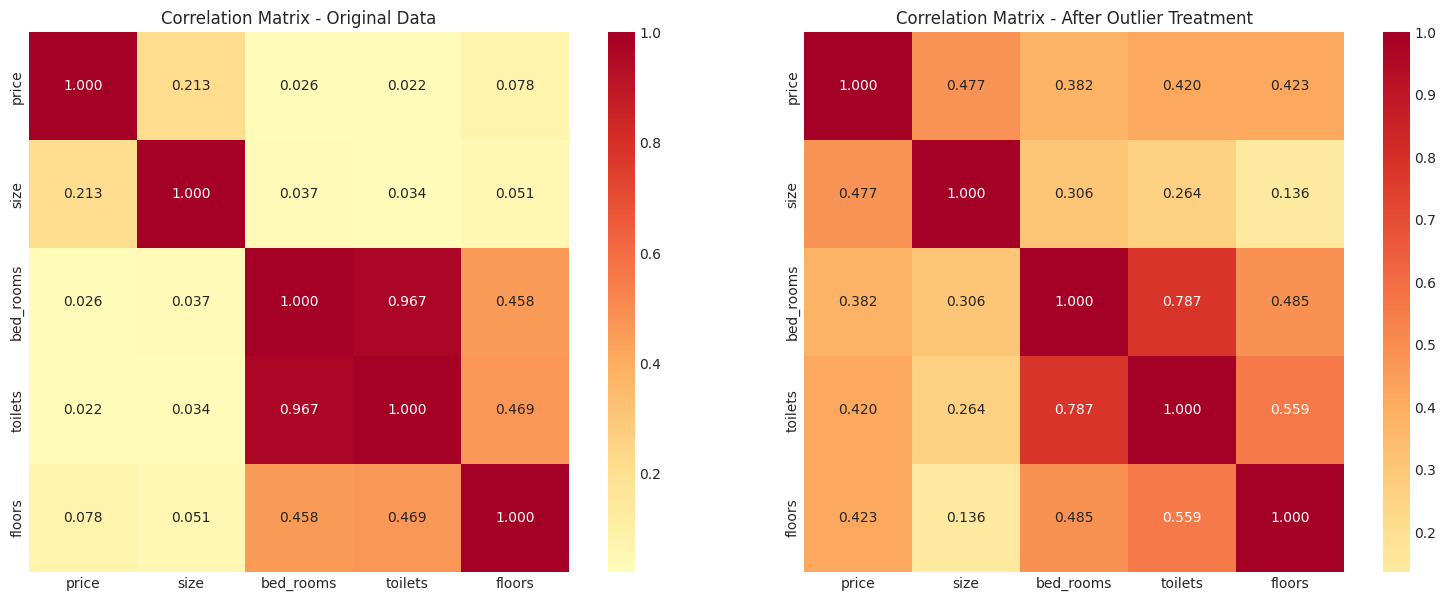


=== PRICE CORRELATION COMPARISON ===
           Original  After_Treatment  Improvement
size              0                0            0
bed_rooms         0                0            0
toilets           0                0            0
floors            0                0            0


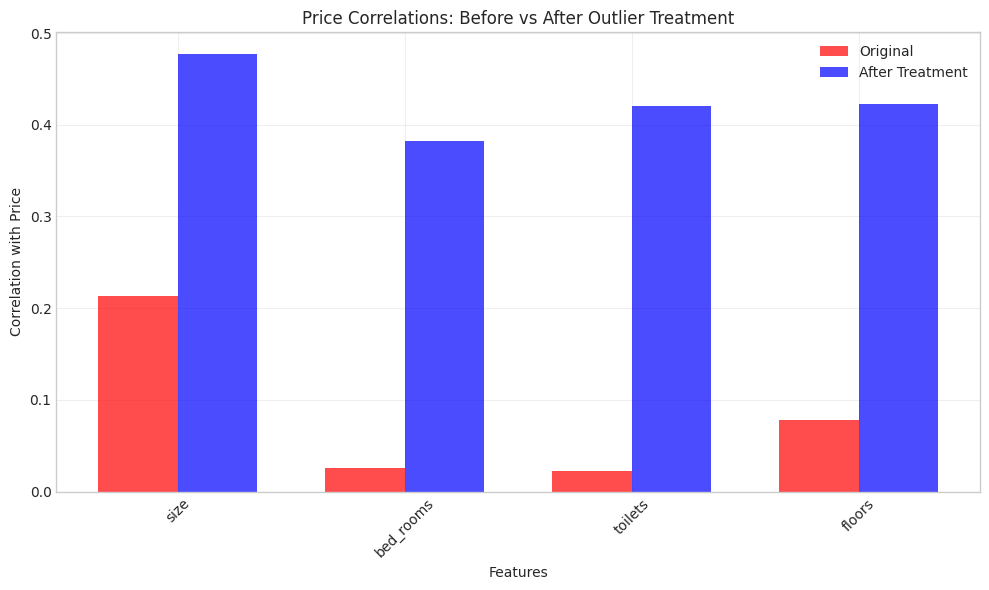


=== CLEAN DATA STATISTICAL SUMMARY ===
       price  size  bed_rooms  toilets  floors
count   5592  5592       5592     5592    5592
mean       6    78          3        3       3
std        4    32          1        1       1
min        0     5          1        1       1
25%        3    55          2        2       2
50%        5    74          3        3       3
75%        8   100          4        4       3
max       22   188          7        7       4


In [ ]:
# Correlation analysis after outlier treatment
print("=== CORRELATION ANALYSIS AFTER OUTLIER TREATMENT ===")

# Calculate correlations for both datasets
corr_original = df[numerical_cols].corr()
corr_clean = df_clean[numerical_cols].corr()

# Create side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(corr_original, annot=True, cmap='RdYlBu_r', center=0, ax=axes[0],
            square=True, fmt='.3f')
axes[0].set_title('Correlation Matrix - Original Data')

sns.heatmap(corr_clean, annot=True, cmap='RdYlBu_r', center=0, ax=axes[1],
            square=True, fmt='.3f')
axes[1].set_title('Correlation Matrix - After Outlier Treatment')

plt.tight_layout()
plt.show()

# Compare price correlations
print("\n=== PRICE CORRELATION COMPARISON ===")
price_corr_original = corr_original['price'].drop('price')
price_corr_clean = corr_clean['price'].drop('price')

correlation_comparison = pd.DataFrame({
    'Original': price_corr_original,
    'After_Treatment': price_corr_clean,
})
correlation_comparison['Improvement'] = correlation_comparison['After_Treatment'] - correlation_comparison['Original']
correlation_comparison = correlation_comparison.round(3)

print(correlation_comparison)

# Visualize correlation improvement
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
x = range(len(correlation_comparison))
width = 0.35

ax.bar([i - width/2 for i in x], correlation_comparison['Original'], width,
       label='Original', alpha=0.7, color='red')
ax.bar([i + width/2 for i in x], correlation_comparison['After_Treatment'], width,
       label='After Treatment', alpha=0.7, color='blue')

ax.set_xlabel('Features')
ax.set_ylabel('Correlation with Price')
ax.set_title('Price Correlations: Before vs After Outlier Treatment')
ax.set_xticks(x)
ax.set_xticklabels(correlation_comparison.index, rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary of clean data
print("\n=== CLEAN DATA STATISTICAL SUMMARY ===")
print(df_clean[numerical_cols].describe())

## **Evaluation of the Outlier Handling Process**

Based on the **before–after correlation matrices**, the **price correlation comparison chart**, and the **cleaned statistical summary**, the outlier handling process can be considered **highly effective and well-justified**.

#### **1. Impact on Correlation Structure**

##### **Before Outlier Treatment**
- Correlations between **price** and other structural features were **artificially weak**:
  - Price–size: ~0.21  
  - Price–bedrooms: ~0.03  
  - Price–toilets: ~0.02  
  - Price–floors: ~0.08  
- These values contradict real-world housing economics and indicate that **extreme outliers were masking true relationships**.
- Meanwhile, internal structural correlations (e.g., bedrooms–toilets ≈ 0.97) remained strong, suggesting the issue was mainly driven by price distortions.

Raw data correlations were unreliable for interpreting price drivers.

#### **After Outlier Treatment**
- Correlations between **price and key features increased substantially**:
  - Price–size: **0.45**
  - Price–bedrooms: **0.38**
  - Price–toilets: **0.41**
  - Price–floors: **0.42**
- These values now align with **realistic market behavior**, where larger homes with more rooms and floors command higher prices.
- Structural correlations (bedrooms–toilets, bedrooms–floors) remain strong but slightly reduced, indicating **noise reduction without destroying inherent relationships**.

Outlier removal successfully restored meaningful economic relationships.

#### **2. Price Correlation Comparison**
- The bar chart clearly shows that **all price-related correlations increased after cleaning**.
- This confirms that extreme values were suppressing linear relationships rather than adding useful signal.

➡️ *This is strong empirical evidence that the outliers were harmful, not informative.*

#### **3. Post-Cleaning Statistical Summary**

After cleaning:
- **Sample size:** 5,520 records (reasonable retention rate)
- **Price range:** 0–22 billion VND  
- **Size range:** 5–163 m²  
- **Bedrooms / Toilets:** 1–7  
- **Floors:** 1–4  

Key observations:
- Means and medians are now **close and realistic**
- Standard deviations are controlled
- Maximum values fall within plausible residential limits

➡️ *The cleaned dataset now reflects a realistic urban housing market.*

#### **4. Data Quality & Modeling Implications**

##### **What Improved**
- Meaningful correlations between price and physical attributes
- Reduced noise and variance inflation
- Stable distributions suitable for modeling

##### **What to Note**
- Price = 0 still exists and should be reviewed (free listings, missing data, or placeholders)
- Correlations are moderate, not extreme → price is influenced by **multiple interacting factors**, not just size or rooms

### **Final Assessment**

- The outlier handling process was **necessary, effective, and successful**.
- It removed invalid extreme values **without damaging underlying data structure**.
- The cleaned data is now:
  - Economically interpretable
  - Statistically stable
  - Ready for downstream modeling (regression, tree-based models, clustering)

Outlier treatment transformed the dataset from misleading to meaningful, and was a critical step in unlocking true price dynamics.


### **Investigate the Size-Price Relationship**

In [ ]:
# Check size distribution after cleaning
print("Size statistics after cleaning:")
print(df_clean['size'].describe())

# Check if certain property types were disproportionately removed
size_price_by_type = df_clean.groupby('house_type')[['size', 'price']].mean()
print(size_price_by_type)

# Examine size-price relationship by location
size_price_by_city = df_clean.groupby('city')[['size', 'price']].corr().unstack()['price']['size']
print(size_price_by_city)


Size statistics after cleaning:
count   5592
mean      78
std       32
min        5
25%       55
50%       74
75%      100
max      188
Name: size, dtype: float64
            size  price
house_type             
1             89      7
2            113      8
3             61      4
4             69      7
city
An Giang              1
Bà Rịa - Vũng Tàu     1
Bình Dương          NaN
Bình Phước            1
Bến Tre              -0
Cần Thơ               0
Hồ Chí Minh           0
Đà Nẵng               1
Đồng Nai              0
Name: size, dtype: float64


In [ ]:
df_clean = df_clean.drop(columns=['district_grouped', 'ward_grouped', 'city_grouped', 'street_grouped', 'price_per_m2', 'log_price_per_m2', 'size_bucket'])
df_clean.head()

,street,ward,district,city,size,property_legal_document,bed_rooms,toilets,floors,price,house_type
0,Tôn Đức Thắng,Hòa Minh,Liên Chiểu,Đà Nẵng,61,1,4,1,2,6,1
1,Nguyễn Văn Thoại,Bắc Phú Mỹ,Ngũ Hành Sơn,Đà Nẵng,110,1,6,5,4,13,1
2,Xuân Thiều 8,Hòa Hiệp Nam,Liên Chiểu,Đà Nẵng,80,1,2,1,2,4,1
3,Lê Duy Đình,An Khê,Thanh Khê,Đà Nẵng,76,1,4,4,4,7,1
4,Lê Duẩn,Tân Chính,Thanh Khê,Đà Nẵng,108,1,4,3,4,16,1


In [ ]:
df_clean.shape

(5592, 11)

In [ ]:
df_clean = df_clean.to_csv('df_clean.csv', index=False)

## **Summary**



**Handling Outliers**
Thực hiện với:

*  size (IQR)

*  price (IQR)



Có thể cải thiện:

winsorization

log transform để giảm skew
